In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

startDate_UTC = dt.datetime(2013,1,1)
endDate_UTC = dt.datetime.today()

In [2]:
# Read in csv to speed up process
df = pd.DataFrame()
#df = pd.read_csv('IE_data.csv') #Uncomment to used
df = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\IE_data.csv')
df.columns = ['','DA_Prices', 'Total_Wind_Fcast', 'Total_Demand_Fcast','Wind_Penetration_Fcast']
df[''] = pd.to_datetime(df[''], format='%Y/%m/%d')
df = df.set_index('')
df = df.dropna()
df = df.loc[df.index < dt.datetime(2021,1,1)]
df

DA_Prices  Total_Wind_Fcast  Total_Demand_Fcast  \
                                                                       
2013-01-01 00:00:00      48.71          1042.239            3803.080   
2013-01-01 01:00:00      48.71          1092.219            3518.080   
2013-01-01 02:00:00      36.75          1140.414            3221.360   
2013-01-01 03:00:00      36.41          1175.463            2994.740   
2013-01-01 04:00:00      36.41          1173.676            2900.830   
...                        ...               ...                 ...   
2020-12-31 19:00:00      64.28          2103.129            5881.589   
2020-12-31 20:00:00      62.66          2051.916            5531.672   
2020-12-31 21:00:00      56.90          1972.792            5202.729   
2020-12-31 22:00:00      50.70          1878.701            4762.078   
2020-12-31 23:00:00      55.09          1971.151            4341.172   

                     Wind_Penetration_Fcast  
                                             
2013-01-01 00:00:00                   0.274  
2013-01-01 01:00:00                   0.310  
2013-01-01 02:00:00                   0.354  
2013-01-01 03:00:00                   0.393  
2013-01-01 04:00:00                   0.405  
...                                     ...  
2020-12-31 19:00:00                   0.358  
2020-12-31 20:00:00                   0.371  
2020-12-31 21:00:00                   0.379  
2020-12-31 22:00:00                   0.395  
2020-12-31 23:00:00                   0.454  

[70128 rows x 4 columns]

In [82]:
df.DA_Prices.loc[df.index >= dt.datetime(2020,1,1)].mean()

37.63554701730401

In [3]:
# Read in csv to speed up process
df_inter = pd.DataFrame()
df_inter = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\interconnector_data.csv')

#df_inter = pd.read_csv('interconnector_data.csv') #Uncomment to use


df_inter.columns = ['','GBIE_Flow', 'IEGB_Flow', 'Value']
df_inter[''] = pd.to_datetime(df_inter[''], format='%Y/%m/%d')
df_inter = df_inter.drop_duplicates(subset=[''], keep='first')
df_inter = df_inter.set_index('')
df_inter = df_inter.fillna(value = 0.00)
df_inter = df_inter.loc[df_inter.index < dt.datetime(2021,1,1)]


df_inter['DA_Prices'] = (df['DA_Prices'].loc[df.index>=dt.datetime(2015,1,1)]).tolist()
df_inter['Total_Wind_Fcast'] = (df['Total_Wind_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Total_Demand_Fcast'] = (df['Total_Demand_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['Wind_Penetration_Fcast'] = (df['Wind_Penetration_Fcast'].loc[df.index>=dt.datetime(2015,1,1,0,0)]).tolist()
df_inter['SNSP'] =  (df_inter['Total_Wind_Fcast'] + df_inter['GBIE_Flow'])/(df_inter['Total_Demand_Fcast'] + df_inter['IEGB_Flow'])
df_inter

GBIE_Flow  IEGB_Flow  Value  DA_Prices  Total_Wind_Fcast  \
                                                                                
2015-01-01 00:00:00        0.0        0.0    0.0      44.24          1265.235   
2015-01-01 01:00:00        0.0        0.0    0.0      44.24          1321.230   
2015-01-01 02:00:00        0.0        0.0    0.0      30.98          1391.480   
2015-01-01 03:00:00        0.0        0.0    0.0      30.97          1458.005   
2015-01-01 04:00:00        0.0        0.0    0.0      30.70          1537.880   
...                        ...        ...    ...        ...               ...   
2020-12-31 19:00:00        0.0      898.0 -898.0      64.28          2103.129   
2020-12-31 20:00:00        0.0      900.0 -900.0      62.66          2051.916   
2020-12-31 21:00:00        0.0      900.0 -900.0      56.90          1972.792   
2020-12-31 22:00:00        0.0      900.0 -900.0      50.70          1878.701   
2020-12-31 23:00:00        0.0      602.0 -602.0      55.09          1971.151   

                     Total_Demand_Fcast  Wind_Penetration_Fcast      SNSP  
                                                                           
2015-01-01 00:00:00            3731.144                   0.339  0.339101  
2015-01-01 01:00:00            3523.522                   0.375  0.374974  
2015-01-01 02:00:00            3230.744                   0.431  0.430700  
2015-01-01 03:00:00            2990.135                   0.488  0.487605  
2015-01-01 04:00:00            2834.995                   0.542  0.542463  
...                                 ...                     ...       ...  
2020-12-31 19:00:00            5881.589                   0.358  0.310215  
2020-12-31 20:00:00            5531.672                   0.371  0.319033  
2020-12-31 21:00:00            5202.729                   0.379  0.323264  
2020-12-31 22:00:00            4762.078                   0.395  0.331804  
2020-12-31 23:00:00            4341.172                   0.454  0.398762  

[52608 rows x 8 columns]

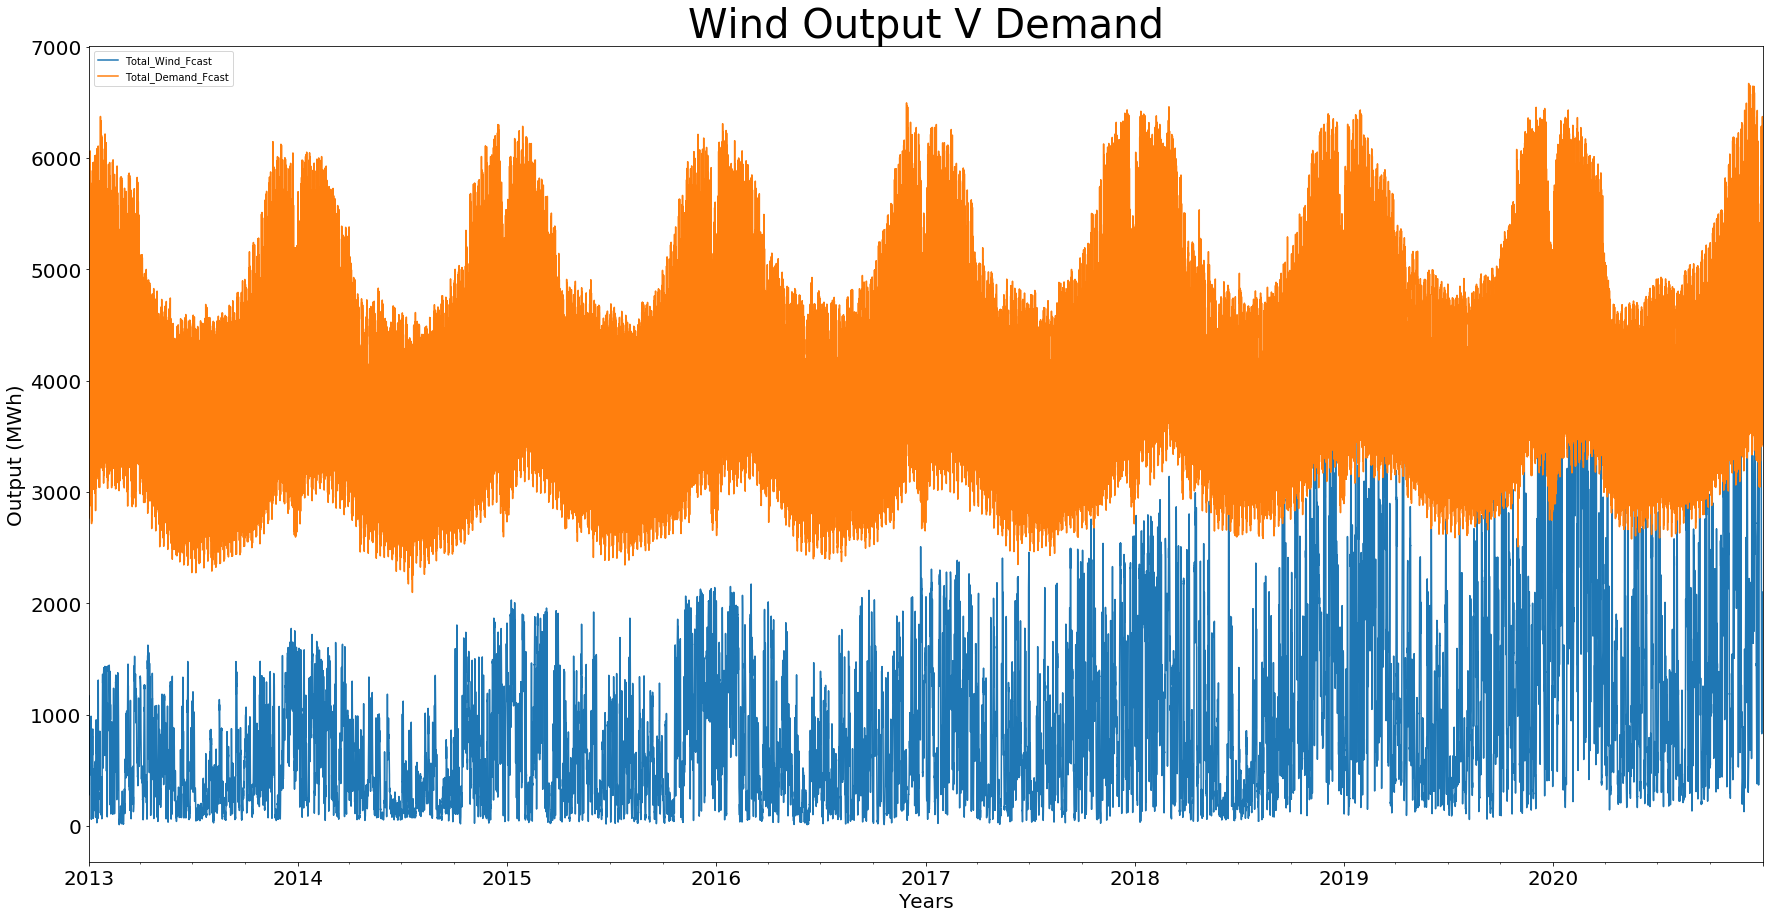

In [4]:
df[['Total_Wind_Fcast','Total_Demand_Fcast']].plot(figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Wind Output V Demand', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('Output (MWh)',size=20)
plt.yticks(size=20);

High winds appear to occur with higher demand. However, there are many occassions where this is not ture and high winds have occured at lower demand


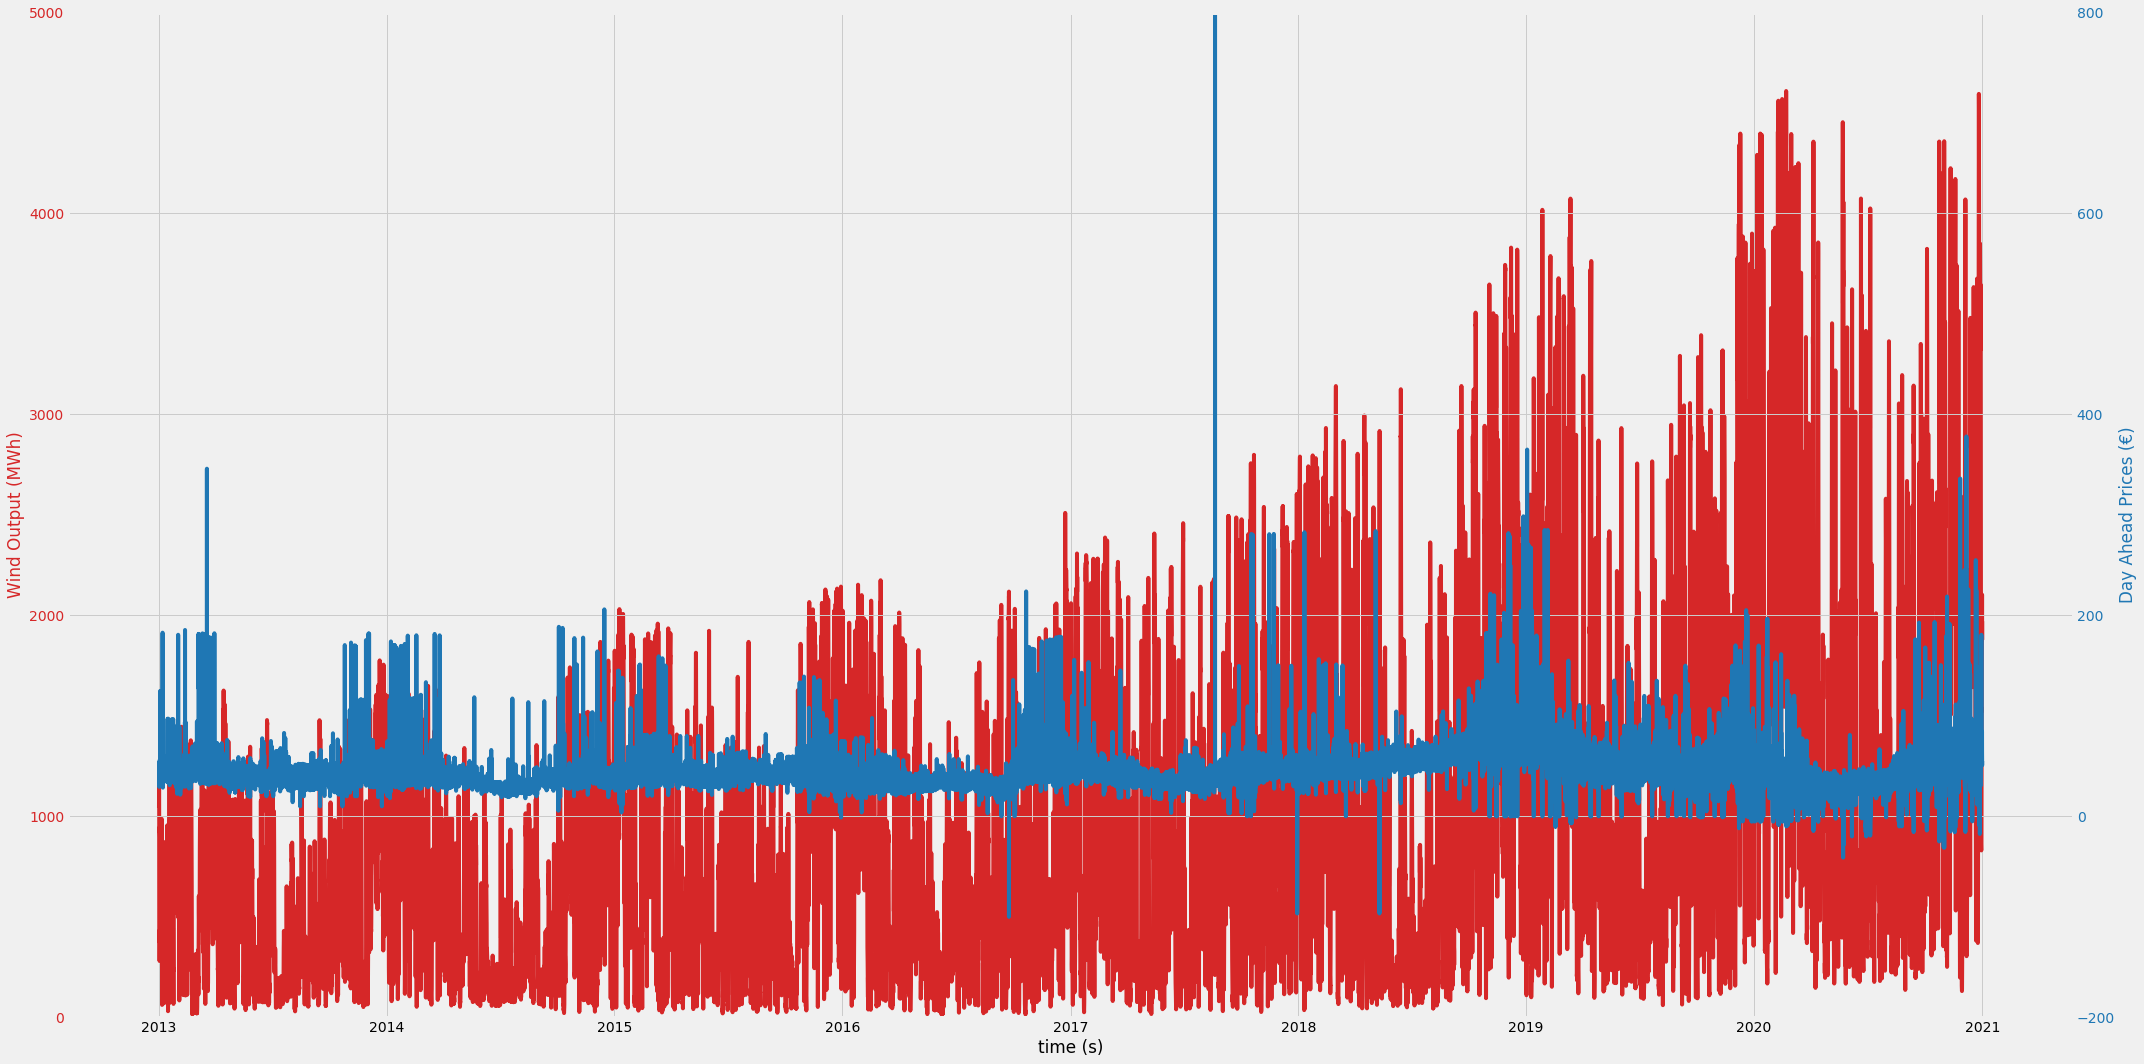

In [5]:
fig, ax1 = plt.subplots(figsize=(30,15))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Wind Output (MWh)', color=color)
ax1.plot(df[['Total_Wind_Fcast']], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 5000);


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Day Ahead Prices (€)', color=color)  
ax2.plot(df[['DA_Prices']], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-200, 800);

fig.tight_layout()  
plt.figsize=(30,15)
plt.show()

From this graph, even though it is hard to see, it appears that high day ahead prices have occured with high winds. This is unusal as the opposite is believed to be true. However, higher winds have occured in the winter months, when demand is higher.  The data may need to be split into seasonal to get a better representation 


In [6]:
df_01 = df.loc[(df.Wind_Penetration_Fcast >= 0.00) & (df.Wind_Penetration_Fcast < 0.1)]
df_12 = df.loc[(df.Wind_Penetration_Fcast >= 0.10) & (df.Wind_Penetration_Fcast < 0.2)]
df_23 = df.loc[(df.Wind_Penetration_Fcast >= 0.20) & (df.Wind_Penetration_Fcast < 0.3)]
df_34 = df.loc[(df.Wind_Penetration_Fcast >= 0.30) & (df.Wind_Penetration_Fcast < 0.4)]
df_45 = df.loc[(df.Wind_Penetration_Fcast >= 0.40) & (df.Wind_Penetration_Fcast < 0.5)]
df_56 = df.loc[(df.Wind_Penetration_Fcast >= 0.50) & (df.Wind_Penetration_Fcast < 0.6)]
df_67 = df.loc[(df.Wind_Penetration_Fcast >= 0.60) & (df.Wind_Penetration_Fcast < 0.7)]
df_78 = df.loc[(df.Wind_Penetration_Fcast >= 0.70) & (df.Wind_Penetration_Fcast < 0.8)]
df_89 = df.loc[(df.Wind_Penetration_Fcast >= 0.80) & (df.Wind_Penetration_Fcast < 0.9)]
df_910 = df.loc[(df.Wind_Penetration_Fcast >= 0.90) & (df.Wind_Penetration_Fcast < 1.0)]
df_100 = df.loc[(df.Wind_Penetration_Fcast >= 1.0)]

In [7]:
df_table = pd.DataFrame()
df_table['Wind Penetration %'] = ['0%-10%','10%-20%','20%-30%','30%-40%','40%-50','50%-60%','60%-70%','70%-80%','80%-90%','90%-100%','100%+']
df_table['Mean Day Ahead Prices'] = [df_01.DA_Prices.mean(),df_12.DA_Prices.mean(),df_23.DA_Prices.mean(),
                                     df_34.DA_Prices.mean(),df_45.DA_Prices.mean(),df_56.DA_Prices.mean(),
                                     df_67.DA_Prices.mean(),df_78.DA_Prices.mean(),df_89.DA_Prices.mean(),
                                     df_910.DA_Prices.mean(),df_100.DA_Prices.mean()]

df_table['Hours at given wind penetration'] = [df_01.DA_Prices.count(),df_12.DA_Prices.count(),df_23.DA_Prices.count(),
                                                 df_34.DA_Prices.count(),df_45.DA_Prices.count(),df_56.DA_Prices.count(),
                                                 df_67.DA_Prices.count(),df_78.DA_Prices.count(),df_89.DA_Prices.count(),
                                                 df_910.DA_Prices.count(),df_100.DA_Prices.count()]


df_table['% of Negative price hours at given wind penetration'] = [(df_01.DA_Prices.loc[df_01.DA_Prices < 0]).count()/((df_01.DA_Prices).count())*100,
                                                                  (df_12.DA_Prices.loc[df_12.DA_Prices < 0]).count()/((df_12.DA_Prices).count())*100,
                                                                  (df_23.DA_Prices.loc[df_23.DA_Prices < 0]).count()/((df_23.DA_Prices).count())*100,
                                                                  (df_34.DA_Prices.loc[df_34.DA_Prices < 0]).count()/((df_34.DA_Prices).count())*100, 
                                                                  (df_45.DA_Prices.loc[df_45.DA_Prices < 0]).count()/((df_45.DA_Prices).count())*100, 
                                                                  (df_56.DA_Prices.loc[df_56.DA_Prices < 0]).count()/((df_56.DA_Prices).count())*100, 
                                                                  (df_67.DA_Prices.loc[df_67.DA_Prices < 0]).count()/((df_67.DA_Prices).count())*100, 
                                                                  (df_78.DA_Prices.loc[df_78.DA_Prices < 0]).count()/((df_78.DA_Prices).count())*100, 
                                                                  (df_89.DA_Prices.loc[df_89.DA_Prices < 0]).count()/((df_89.DA_Prices).count())*100, 
                                                                  (df_910.DA_Prices.loc[df_910.DA_Prices < 0]).count()/((df_910.DA_Prices).count())*100, 
                                                                  (df_100.DA_Prices.loc[df_100.DA_Prices < 0]).count()/((df_100.DA_Prices).count())*100]



df_table.round(3)

Wind Penetration %  Mean Day Ahead Prices  Hours at given wind penetration  \
0              0%-10%                 46.886                            21431   
1             10%-20%                 45.361                            16708   
2             20%-30%                 43.322                            11751   
3             30%-40%                 40.955                             7870   
4              40%-50                 40.288                             4897   
5             50%-60%                 39.222                             2936   
6             60%-70%                 37.204                             1823   
7             70%-80%                 31.036                             1164   
8             80%-90%                 22.168                              639   
9            90%-100%                 12.441                              388   
10              100%+                 -2.382                              521   

    % of Negative price hours at given wind penetration  
0                                               0.000    
1                                               0.000    
2                                               0.000    
3                                               0.000    
4                                               0.000    
5                                               0.000    
6                                               0.658    
7                                               2.577    
8                                               7.512    
9                                              21.649    
10                                             63.916

In [8]:
df_da = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_da['Date'] = data_list
df_da = df_da.set_index('Date')

for year in range(2013,2021):  
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.DA_Prices.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_da['%s_DA_Prices' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.DA_Prices.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_da['%s_DA_Prices' %year] = year_list
        

        
        

df_wind = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wind['Date'] = data_list
df_wind = df_wind.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wind['%s_Wind_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Wind_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wind['%s_Wind_Fcast' %year] = year_list
        

        
df_dmd = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_dmd['Date'] = data_list
df_dmd = df_dmd.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_dmd['%s_Demand_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Total_Demand_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_dmd['%s_Demand_Fcast' %year] = year_list

        
df_wp = pd.DataFrame()
data = pd.date_range('1/1/2000', periods = 8784, freq ='H')
data_list = data.tolist()
df_wp['Date'] = data_list
df_wp = df_wp.set_index('Date')

for year in range(2013,2021):   
    if year%4 != 0:
        
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
        
        for i in range(1416,1440):
            year_list.insert(i, np.nan)
            
        df_wp['%s_WP_Fcast' %year] = year_list 
        
    elif year%4 == 0:
 
        dfa = pd.DataFrame()
        dfa = df.Wind_Penetration_Fcast.loc[(df.index>=dt.datetime(year,1,1)) & (df.index<dt.datetime(year+1,1,1))]
        year_list = dfa.tolist()
     
        df_wp['%s_WP_Fcast' %year] = year_list



In [9]:
#Monthly da percentage increase
df_da_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %year].iloc[i+1] - (df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %year].iloc[i] ) /((df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %year].iloc[0] - (df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %(year-1)].iloc[11] ) /((df_da.groupby(df_da.index.month).mean())['%s_DA_Prices' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_da_month['%s_da_per' %year] = thelist


#Monthly wind percentage increase
df_wind_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i+1] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %year].iloc[0] - (df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11] ) /((df_wind.groupby(df_wind.index.month).sum())['%s_Wind_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wind_month['%s_wind_per' %year] = thelist
    
    
#Monthly demand percentage increase
df_dmd_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i+1] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %year].iloc[0] - (df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11] ) /((df_dmd.groupby(df_dmd.index.month).sum())['%s_Demand_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_dmd_month['%s_demand_per' %year] = thelist
    
    
#Monthly WP percentage increase
df_wp_month = pd.DataFrame()

for year in range(2013,2021): 
    thelist = []
    
    for i in range(0,11):
        thelist.append(( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i+1] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[i]) )
    
    if year >= 2014:
        x = ( (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %year].iloc[0] - (df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11] ) /((df_wp.groupby(df_wp.index.month).sum())['%s_WP_Fcast' %(year-1)].iloc[11]) 
        thelist.insert(0,x)  
    else:
        thelist.insert(0,np.nan)
    df_wp_month['%s_wind_penetration_per' %year] = thelist

In [10]:
df_year = pd.DataFrame()
yearlist = []

for year in range(2013,2021):
    yearlist.append(year)

df_year['Year'] = yearlist
df_year['Average_Yearly_Price']  = ((df_da.groupby(df_da.index.year).mean()).iloc[0]).tolist()
df_year['Total_Yearly_Wind (TWh)']  = (((df_wind.groupby(df_wind.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Total_Yearly_Demand (TWh)']  = (((df_dmd.groupby(df_dmd.index.year).sum()).iloc[0])/(1000000)).tolist()
df_year['Average_Yearly_WP']  = ((df_wp.groupby(df_wp.index.year).mean()).iloc[0]).tolist()

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Average_Yearly_Price'].loc[i+1] - df_year['Average_Yearly_Price'].iloc[i] ) /(df_year['Average_Yearly_Price'].loc[i]) )
thelist.insert(0,df_da_month['2013_da_per'].mean())
df_year['Average_Yearly_Price_Per' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Wind (TWh)'].loc[i+1] - df_year['Total_Yearly_Wind (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Wind (TWh)'].loc[i]) )
thelist.insert(0,df_wind_month['2013_wind_per'].mean())
df_year['Total_Yearly_Wind (Per)' ] = thelist

thelist = []
for i in range(0,7):
    thelist.append(( df_year['Total_Yearly_Demand (TWh)'].loc[i+1] - df_year['Total_Yearly_Demand (TWh)'].iloc[i] ) /(df_year['Total_Yearly_Demand (TWh)'].loc[i]) )
thelist.insert(0,df_dmd_month['2013_demand_per'].mean())
df_year['Total_Yearly_Demand (Per)' ] = thelist


thelist = []
for i in range(0,7):
    thelist.append(( df_year['Average_Yearly_WP'].loc[i+1] - df_year['Average_Yearly_WP'].iloc[i] ) /(df_year['Average_Yearly_WP'].loc[i]) )
thelist.insert(0,df_wp_month['2013_wind_penetration_per'].mean())
df_year['Average_Yearly_WP_Per' ] = thelist


df_year = df_year.set_index(['Year'])

In [11]:
df_increases = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Total Data Analysis and Neg Price Model\percentage_predictions.csv')

#df_increases = pd.read_csv('percentage_predictions.csv') #Uncomment to use
df_increases.columns = ['','Wind', 'Renewables', 'Import','Export','Low Demand', 'Median Demand', 'High Demand','Average Demand','Solar']
df_increases[''] = pd.to_datetime(df_increases[''], format='%Y')
df_increases = df_increases.set_index('')
df_increases

Wind  Renewables  Import  Export  Low Demand  Median Demand  \
                                                                            
2020-01-01  0.0000      0.0000  0.0000  0.0000     0.01280         0.0255   
2021-01-01  0.0357      0.0502 -0.0667  0.0000     0.01260         0.0299   
2022-01-01  0.0454      0.0477  0.2857  0.0000     0.01490         0.0386   
2023-01-01  0.0423      0.1121  0.0556  0.0000     0.01720         0.0256   
2024-01-01  0.0517      0.0664 -0.0263  0.3056     0.01930         0.0272   
2025-01-01  0.0302      0.1127  0.4238  0.2553     0.01180         0.0155   
2026-01-01  0.0176      0.1461  0.2976  0.2034     0.01400         0.0217   
2027-01-01  0.0173      0.1275  0.2288  0.1268     0.01150         0.0191   
2028-01-01  0.0170      0.1129  0.0000  0.0000     0.01370         0.0209   
2029-01-01  0.0167      0.1016  0.0000  0.0000     0.00900         0.0184   
2030-01-01  0.0213      0.0785  0.0000  0.0000     0.01368         0.0242   
2031-01-01  0.0208      0.0785  0.0000  0.0000     0.01368         0.0242   
2032-01-01  0.0204      0.0785  0.0000  0.0000     0.01368         0.0242   
2033-01-01  0.0200      0.0785  0.0000  0.0000     0.01368         0.0242   
2034-01-01  0.0196      0.0785  0.0000  0.0000     0.01368         0.0242   
2035-01-01  0.0192      0.0785  0.0000  0.0000     0.01368         0.0242   
2036-01-01  0.0188      0.0785  0.0000  0.0000     0.01368         0.0242   
2037-01-01  0.0185      0.0785  0.0000  0.0000     0.01368         0.0242   
2038-01-01  0.0182      0.0785  0.0000  0.0000     0.01368         0.0242   
2039-01-01  0.0178      0.0785  0.0000  0.0000     0.01368         0.0242   
2040-01-01  0.0175      0.0785  0.0000  0.0000     0.01368         0.0242   

            High Demand  Average Demand   Solar  
                                                 
2020-01-01       0.0383          0.0319  0.0000  
2021-01-01       0.0491          0.0395  1.4686  
2022-01-01       0.0585          0.0486  0.6323  
2023-01-01       0.0310          0.0283  0.0000  
2024-01-01       0.0365          0.0319  0.1081  
2025-01-01       0.0311          0.0233  0.1140  
2026-01-01       0.0321          0.0269  0.1365  
2027-01-01       0.0292          0.0242  0.1208  
2028-01-01       0.0284          0.0247  0.0082  
2029-01-01       0.0221          0.0203  0.0618  
2030-01-01       0.0356          0.0299  0.0582  
2031-01-01       0.0356          0.0299  0.0488  
2032-01-01       0.0356          0.0299  0.0569  
2033-01-01       0.0356          0.0299  0.0533  
2034-01-01       0.0356          0.0299  0.0511  
2035-01-01       0.0356          0.0299  0.0486  
2036-01-01       0.0356          0.0299  0.0463  
2037-01-01       0.0356          0.0299  0.0439  
2038-01-01       0.0356          0.0299  0.0424  
2039-01-01       0.0356          0.0299  0.0407  
2040-01-01       0.0356          0.0299  0.0388

In [12]:
df_year_update = pd.DataFrame()
yearlist = []

for year in range(2013,2041):
    yearlist.append(year)

df_year_update['Year'] = yearlist

thelist = []
thelist.extend((df_year['Total_Yearly_Wind (Per)'].tolist()))
thelist.extend((df_increases['Wind'].tolist())[1::])
df_year_update['Wind Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Low Demand'].tolist())[1::])
df_year_update['Low Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Median Demand'].tolist())[1::])
df_year_update['Median Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['High Demand'].tolist())[1::])
df_year_update['High Demand Increase' ] = thelist

thelist = []
thelist.extend((df_year['Total_Yearly_Demand (Per)'].tolist()))
thelist.extend((df_increases['Average Demand'].tolist())[1::])
df_year_update['Average Demand Increase' ] = thelist

thelist = []
thelist.extend( [0.0,0.0,0.0,0.0,0.0,0.0,0.0] )
thelist.extend((df_increases['Solar'].tolist())[::])
df_year_update['Solar Increase' ] = thelist

In [13]:
df_year_update['Year'] = pd.to_datetime(df_year_update['Year'], format='%Y')
df_year_update

Year  Wind Increase  Low Demand Increase  Median Demand Increase  \
0  2013-01-01       0.092829            -0.003303               -0.003303   
1  2014-01-01      -0.000903            -0.007134               -0.007134   
2  2015-01-01       0.319547             0.018845                0.018845   
3  2016-01-01      -0.056824             0.013798                0.013798   
4  2017-01-01       0.272075             0.007214                0.007214   
5  2018-01-01       0.246167             0.030542                0.030542   
6  2019-01-01       0.189114             0.002837                0.002837   
7  2020-01-01       0.256805            -0.003080               -0.003080   
8  2021-01-01       0.035700             0.012600                0.029900   
9  2022-01-01       0.045400             0.014900                0.038600   
10 2023-01-01       0.042300             0.017200                0.025600   
11 2024-01-01       0.051700             0.019300                0.027200   
12 2025-01-01       0.030200             0.011800                0.015500   
13 2026-01-01       0.017600             0.014000                0.021700   
14 2027-01-01       0.017300             0.011500                0.019100   
15 2028-01-01       0.017000             0.013700                0.020900   
16 2029-01-01       0.016700             0.009000                0.018400   
17 2030-01-01       0.021300             0.013680                0.024200   
18 2031-01-01       0.020800             0.013680                0.024200   
19 2032-01-01       0.020400             0.013680                0.024200   
20 2033-01-01       0.020000             0.013680                0.024200   
21 2034-01-01       0.019600             0.013680                0.024200   
22 2035-01-01       0.019200             0.013680                0.024200   
23 2036-01-01       0.018800             0.013680                0.024200   
24 2037-01-01       0.018500             0.013680                0.024200   
25 2038-01-01       0.018200             0.013680                0.024200   
26 2039-01-01       0.017800             0.013680                0.024200   
27 2040-01-01       0.017500             0.013680                0.024200   

    High Demand Increase  Average Demand Increase  Solar Increase  
0              -0.003303                -0.003303          0.0000  
1              -0.007134                -0.007134          0.0000  
2               0.018845                 0.018845          0.0000  
3               0.013798                 0.013798          0.0000  
4               0.007214                 0.007214          0.0000  
5               0.030542                 0.030542          0.0000  
6               0.002837                 0.002837          0.0000  
7              -0.003080                -0.003080          0.0000  
8               0.049100                 0.039500          1.4686  
9               0.058500                 0.048600          0.6323  
10              0.031000                 0.028300          0.0000  
11              0.036500                 0.031900          0.1081  
12              0.031100                 0.023300          0.1140  
13              0.032100                 0.026900          0.1365  
14              0.029200                 0.024200          0.1208  
15              0.028400                 0.024700          0.0082  
16              0.022100                 0.020300          0.0618  
17              0.035600                 0.029900          0.0582  
18              0.035600                 0.029900          0.0488  
19              0.035600                 0.029900          0.0569  
20              0.035600                 0.029900          0.0533  
21              0.035600                 0.029900          0.0511  
22              0.035600                 0.029900          0.0486  
23              0.035600                 0.029900          0.0463  
24              0.035600                 0.029900          0.0439  
25     

In [14]:
df_fcast = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Wind' %(i)] = df_wind['%s_Wind_Fcast'%(i)]
        else:
            df_fcast['%s Wind' %(i)] = (df_fcast['%s Wind' %(i-1)])*(1 + (float(df_year_update['Wind Increase'].iloc[k])))
            
        k += 1     

for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Low Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Low Demand' %(i)] = (df_fcast['%s Low Demand' %(i-1)])*(1 + (float(df_year_update['Low Demand Increase'].iloc[k])))
            
        k += 1
        
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s Median Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s Median Demand' %(i)] = (df_fcast['%s Median Demand' %(i-1)])*(1 + (float(df_year_update['Median Demand Increase'].iloc[k])))
            
        k += 1
        
for year in range(2020,2021):  
    k = 7
    for i in range(2020, 2031):
        
        if i <= year:
            df_fcast['%s High Demand' %(i)] = df_dmd['%s_Demand_Fcast'%(i)]
        else:
            df_fcast['%s High Demand' %(i)] = (df_fcast['%s High Demand' %(i-1)])*(1 + (float(df_year_update['High Demand Increase'].iloc[k])))
            
        k += 1
           
    
df_results_a = pd.DataFrame(index=df_wind.index)

for year in range(2020,2021):  
    for i in range(2020, 2031):
        df_results_a['%s WP at Low Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Low Demand' %(i)])
        df_results_a['%s WP at Median Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s Median Demand' %(i)])
        df_results_a['%s WP at High Demand' %(i)] = (df_fcast['%s Wind'%(i)])/(df_fcast['%s High Demand' %(i)])


df_results_a

2020 WP at Low Demand  2020 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.227088                  0.227088   
2000-01-01 01:00:00               0.264516                  0.264516   
2000-01-01 02:00:00               0.316733                  0.316733   
2000-01-01 03:00:00               0.351734                  0.351734   
2000-01-01 04:00:00               0.364237                  0.364237   
...                                    ...                       ...   
2000-12-31 19:00:00               0.357578                  0.357578   
2000-12-31 20:00:00               0.370940                  0.370940   
2000-12-31 21:00:00               0.379184                  0.379184   
2000-12-31 22:00:00               0.394513                  0.394513   
2000-12-31 23:00:00               0.454060                  0.454060   

                     2020 WP at High Demand  2021 WP at Low Demand  \
Date                                                                 
2000-01-01 00:00:00                0.227088               0.232268   
2000-01-01 01:00:00                0.264516               0.270551   
2000-01-01 02:00:00                0.316733               0.323958   
2000-01-01 03:00:00                0.351734               0.359758   
2000-01-01 04:00:00                0.364237               0.372546   
...                                     ...                    ...   
2000-12-31 19:00:00                0.357578               0.365736   
2000-12-31 20:00:00                0.370940               0.379402   
2000-12-31 21:00:00                0.379184               0.387834   
2000-12-31 22:00:00                0.394513               0.403513   
2000-12-31 23:00:00                0.454060               0.464418   

                     2021 WP at Median Demand  2021 WP at High Demand  \
Date                                                                    
2000-01-01 00:00:00                  0.228367                0.224187   
2000-01-01 01:00:00                  0.266006                0.261138   
2000-01-01 02:00:00                  0.318517                0.312687   
2000-01-01 03:00:00                  0.353715                0.347241   
2000-01-01 04:00:00                  0.366288                0.359584   
...                                       ...                     ...   
2000-12-31 19:00:00                  0.359592                0.353011   
2000-12-31 20:00:00                  0.373029                0.366202   
2000-12-31 21:00:00                  0.381319                0.374341   
2000-12-31 22:00:00                  0.396735                0.389474   
2000-12-31 23:00:00                  0.456617                0.448260   

                     2022 WP at Low Demand  2022 WP at Median Demand  \
Date                                                                   
2000-01-01 00:00:00               0.239248                  0.229862   
2000-01-01 01:00:00               0.278681                  0.267748   
2000-01-01 02:00:00               0.333694                  0.320602   
2000-01-01 03:00:00               0.370569                  0.356031   
2000-01-01 04:00:00               0.383742                  0.368686   
...                                    ...                       ...   
2000-12-31 19:00:00               0.376727                  0.361946   
2000-12-31 20:00:00               0.390804                  0.375471   
2000-12-31 21:00:00               0.399490                  0.383816   
2000-12-31 22:00:00               0.415639                  0.399332   
2000-12-31 23:00:00               0.478375                  0.459606   

                     2022 WP at High Demand  2023 WP at Low Demand  ...  \
Date                                                                ...   
2000-01-01 00:00:00                0.221413               0.245152  ...   
2000-01-01 01:00:00                0.257906               0.2

In [15]:
df_table1 = pd.DataFrame()
yearlist = []
lowlist =[]
medlist=[]
highlist=[]
for year in range(2021,2031):
    yearlist.append(year)
    lowlist.append( df_results_a['%s WP at Low Demand' %year].loc[(df_results_a['%s WP at Low Demand' %year] >= 1)].count()  )
    medlist.append( df_results_a['%s WP at Median Demand' %year].loc[(df_results_a['%s WP at Median Demand' %year] >= 1)].count() )
    highlist.append( df_results_a['%s WP at High Demand' %year].loc[(df_results_a['%s WP at High Demand' %year] >= 1)].count())

df_table1['Year']   =  yearlist
df_table1['WP at 100%+ of Low Demand'] = lowlist
df_table1['WP at 100%+ of Median Demand'] = medlist
df_table1['WP at 100%+ of High Demand'] = highlist


lowlist =[]
medlist=[]
highlist=[]
i = 0
for year in range(2021,2031):
    
    x = df_results_a['%s WP at Low Demand' %year].loc[(df_results_a['%s WP at Low Demand' %year] >= 0.9)].count()  
    x = x - df_table1['WP at 100%+ of Low Demand'].iloc[i]
    lowlist.append( x )
    
    y = df_results_a['%s WP at Median Demand' %year].loc[(df_results_a['%s WP at Median Demand' %year] >= 0.9)].count()  
    y = y - df_table1['WP at 100%+ of Median Demand'].iloc[i]
    medlist.append( y )
    
    z = df_results_a['%s WP at High Demand' %year].loc[(df_results_a['%s WP at High Demand' %year] >= 0.9)].count()  
    z = z - df_table1['WP at 100%+ of High Demand'].iloc[i]
    highlist.append( z )
    
    i += 1
    
df_table1['WP at 90%-100% of Low Demand'] = lowlist
df_table1['WP at 90%-100% of Median Demand'] = medlist
df_table1['WP at 90%-100% of High Demand'] = highlist


df_table1['WP at 100%+ of Low Demand'] = df_table1['WP at 100%+ of Low Demand'] *df_table['% of Negative price hours at given wind penetration'].iloc[10]/100
df_table1['WP at 100%+ of Median Demand'] = df_table1['WP at 100%+ of Median Demand'] *df_table['% of Negative price hours at given wind penetration'].iloc[10]/100
df_table1['WP at 100%+ of High Demand'] = df_table1['WP at 100%+ of High Demand'] *df_table['% of Negative price hours at given wind penetration'].iloc[10]/100


df_table1 = df_table1.set_index('Year')
df_table1.round(0)

WP at 100%+ of Low Demand  WP at 100%+ of Median Demand  \
Year                                                            
2021                      258.0                         233.0   
2022                      301.0                         243.0   
2023                      339.0                         263.0   
2024                      385.0                         301.0   
2025                      421.0                         320.0   
2026                      427.0                         316.0   
2027                      436.0                         312.0   
2028                      439.0                         304.0   
2029                      450.0                         303.0   
2030                      464.0                         301.0   

      WP at 100%+ of High Demand  WP at 90%-100% of Low Demand  \
Year                                                             
2021                       208.0                           259   
2022                       187.0                           268   
2023                       206.0                           280   
2024                       226.0                           316   
2025                       225.0                           320   
2026                       206.0                           321   
2027                       186.0                           326   
2028                       178.0                           333   
2029                       171.0                           343   
2030                       157.0                           349   

      WP at 90%-100% of Median Demand  WP at 90%-100% of High Demand  
Year                                                                  
2021                              251                            240  
2022                              255                            246  
2023                              267                            237  
2024                              268                            242  
2025                              276                            243  
2026                              272                            237  
2027                              273                            243  
2028                              277                            229  
2029                              277                            227  
2030                              268                            218

In [16]:
df_fcast

2020 Wind    2021 Wind    2022 Wind    2023 Wind  \
Date                                                                    
2000-01-01 00:00:00    829.282   858.887367   897.880854   935.861214   
2000-01-01 01:00:00    907.662   940.065533   982.744509  1024.314601   
2000-01-01 02:00:00    998.672  1034.324590  1081.282927  1127.021195   
2000-01-01 03:00:00   1049.030  1086.480371  1135.806580  1183.851198   
2000-01-01 04:00:00   1051.785  1089.333725  1138.789476  1186.960270   
...                        ...          ...          ...          ...   
2000-12-31 19:00:00   2103.129  2178.210705  2277.101471  2373.422864   
2000-12-31 20:00:00   2051.916  2125.169401  2221.652092  2315.627976   
2000-12-31 21:00:00   1972.792  2043.220674  2135.982893  2226.334969   
2000-12-31 22:00:00   1878.701  1945.770626  2034.108612  2120.151406   
2000-12-31 23:00:00   1971.151  2041.521091  2134.206148  2224.483068   

                       2024 Wind    2025 Wind    2026 Wind    2027 Wind  \
Date                                                                      
2000-01-01 00:00:00   984.245239  1013.969445  1031.815307  1049.665712   
2000-01-01 01:00:00  1077.271666  1109.805271  1129.337843  1148.875388   
2000-01-01 02:00:00  1185.288190  1221.083894  1242.574970  1264.071517   
2000-01-01 03:00:00  1245.056305  1282.657006  1305.231769  1327.812278   
2000-01-01 04:00:00  1248.326116  1286.025565  1308.659615  1331.299426   
...                          ...          ...          ...          ...   
2000-12-31 19:00:00  2496.128826  2571.511916  2616.770526  2662.040656   
2000-12-31 20:00:00  2435.345942  2508.893389  2553.049913  2597.217676   
2000-12-31 21:00:00  2341.436487  2412.147869  2454.601672  2497.066281   
2000-12-31 22:00:00  2229.763234  2297.102084  2337.531080  2377.970368   
2000-12-31 23:00:00  2339.488843  2410.141406  2452.559895  2494.989181   

                       2028 Wind    2029 Wind  ...  2021 High Demand  \
Date                                           ...                     
2000-01-01 00:00:00  1067.510029  1085.337447  ...       3831.115969   
2000-01-01 01:00:00  1168.406270  1187.918654  ...       3599.882789   
2000-01-01 02:00:00  1285.560733  1307.029597  ...       3307.856362   
2000-01-01 03:00:00  1350.385087  1372.936518  ...       3128.891442   
2000-01-01 04:00:00  1353.931517  1376.542173  ...       3029.424173   
...                          ...          ...  ...               ...   
2000-12-31 19:00:00  2707.295347  2752.507179  ...       6170.375020   
2000-12-31 20:00:00  2641.370377  2685.481262  ...       5803.277095   
2000-12-31 21:00:00  2539.516407  2581.926331  ...       5458.182994   
2000-12-31 22:00:00  2418.395864  2458.783075  ...       4995.896030   
2000-12-31 23:00:00  2537.403997  2579.778644  ...       4554.323545   

                     2022 High Demand  2023 High Demand  2024 High Demand  \
Date                                                                        
2000-01-01 00:00:00       4055.236253       4180.948577       4333.553200   
2000-01-01 01:00:00       3810.475932       3928.600686       4071.994611   
2000-01-01 02:00:00       3501.365959       3609.908304       3741.669957   
2000-01-01 03:00:00       3311.931592       3414.601471       3539.234425   
2000-01-01 04:00:00       3206.645487       3306.051497       3426.722377   
...                               ...               ...               ...   
2000-12-31 19:00:00       6531.341959       6733.813559       6979.597754   
2000-12-31 20:00:00       6142.768805       6333.194638       6564.356243   
2000-12-31 21:00:00       5777.486699       5956.588787       6174.004277   
2000-12-31 22:00:00       5288.155948       5452.088782       5651.090022   
2000-12-31 23:00:00       4820.751473       4970.194768       5151.606877   

                     2025 High Demand  2026 High Demand  2027 High Demand  \
Date                                                                        
20

In [17]:
for year in range(2021,2031):
    if year%4 != 0:
        df_fcast = df_fcast.reset_index()
        df_fcast['%s Wind' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Low Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s Median Demand' %year].iloc[1416:1440] = np.nan 
        df_fcast['%s High Demand' %year].iloc[1416:1440] = np.nan        
        df_fcast = df_fcast.set_index('Date')


C:\Users\09ant\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
#This makes one singular dataframe from 2013-2040 
windhourlist = []
lhourlist = []
mhourlist = []
hhourlist = []
mhhourlist = []

windhourlist = df['Total_Wind_Fcast'].tolist()
lhourlist = df['Total_Demand_Fcast'].tolist()
mhourlist = df['Total_Demand_Fcast'].tolist()
hhourlist = df['Total_Demand_Fcast'].tolist()
mhhourlist = df['Total_Demand_Fcast'].tolist()

for year in range(2021, 2031):
    
    if year%4 != 0:
    # drops nan data of leap year. 
        a = (df_fcast['%s Wind' %year].dropna()).tolist()
        w = (df_fcast['%s Low Demand' %year].dropna()).tolist()
        x = (df_fcast['%s Median Demand' %year].dropna()).tolist()
        y = (df_fcast['%s High Demand' %year].dropna()).tolist()
    
    else:
        
        a = df_fcast['%s Wind' %year].tolist()
        w = df_fcast['%s Low Demand' %year].tolist()
        x = df_fcast['%s Median Demand' %year].tolist()
        y = df_fcast['%s High Demand' %year].tolist()

    windhourlist.extend(a)
    lhourlist.extend(w)
    mhourlist.extend(x)
    hhourlist.extend(y)

data = pd.date_range('1/1/2013', '1/1/2031', freq ='H')
data_list = data.tolist()
data_list.pop()
df1 = pd.DataFrame()
df1['date'] = data_list
df1['wind'] = windhourlist
df1['low demand'] = lhourlist
df1['median demand'] = mhourlist
df1['high demand'] = hhourlist

df1 = df1.set_index('date')

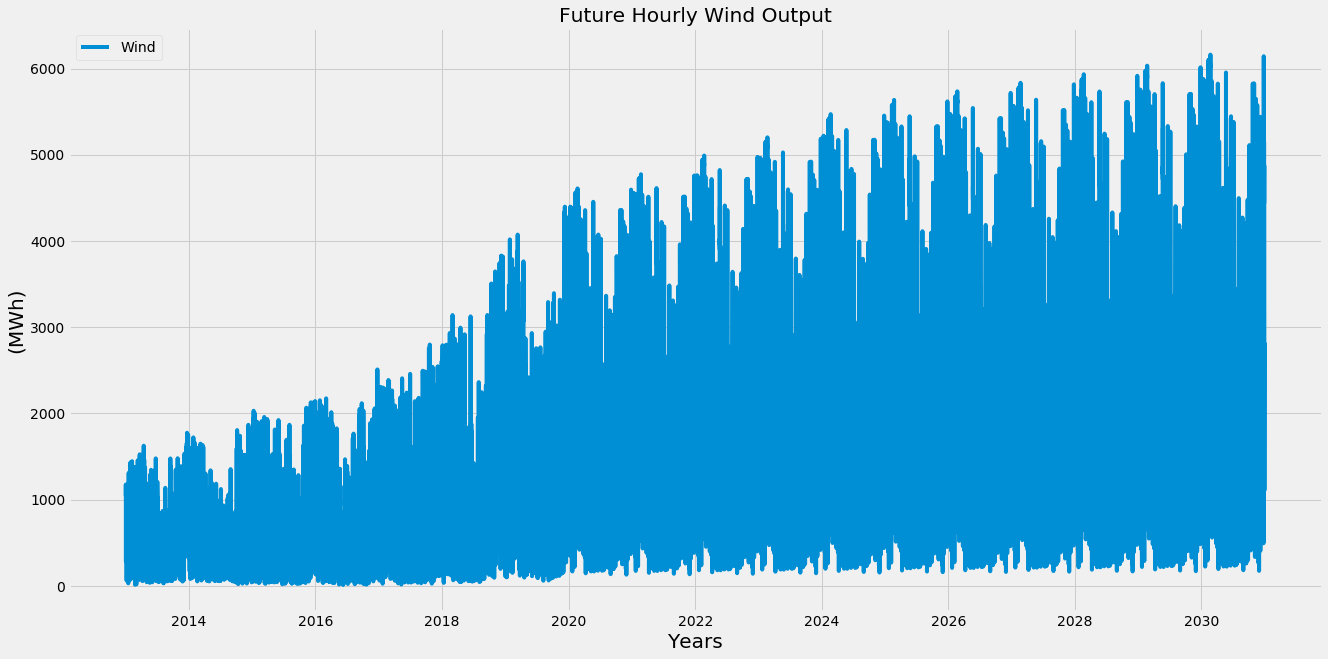

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df1['wind'])
plt.legend(labels=['Wind'])
plt.title('Future Hourly Wind Output')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


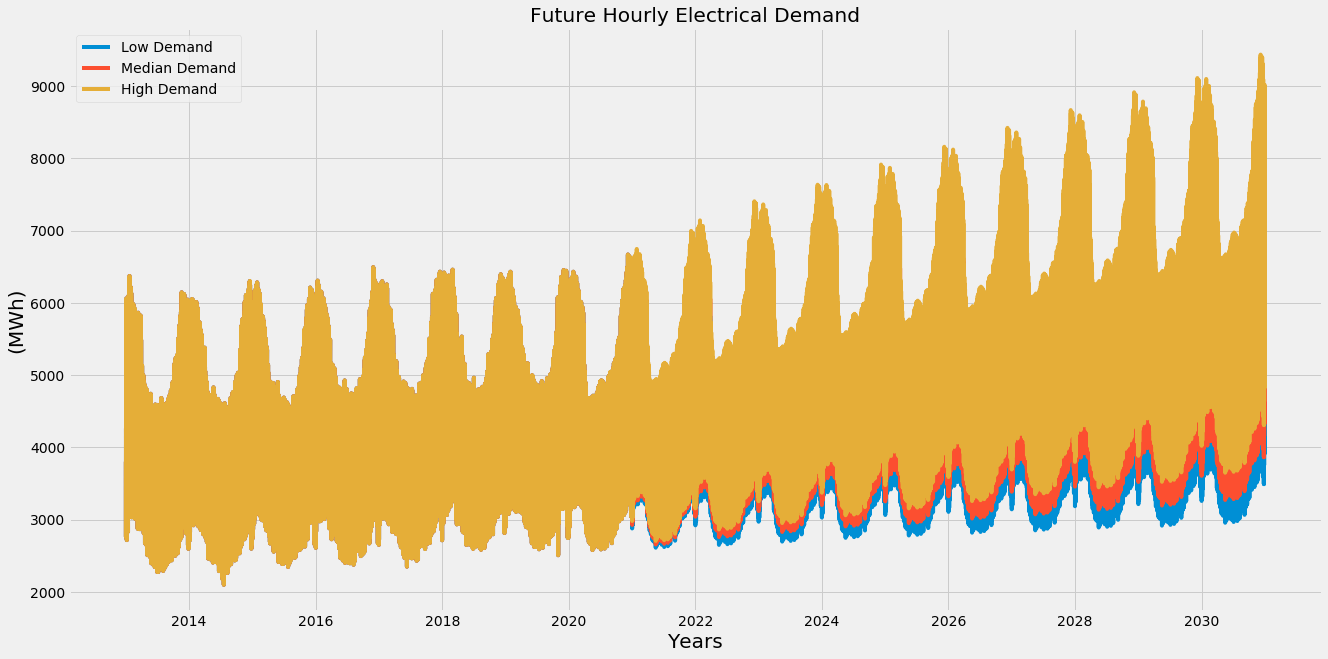

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df1['low demand'])
plt.plot(df1['median demand'])
plt.plot(df1['high demand'])
plt.legend(labels=['Low Demand', 'Median Demand','High Demand'])
plt.title('Future Hourly Electrical Demand')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

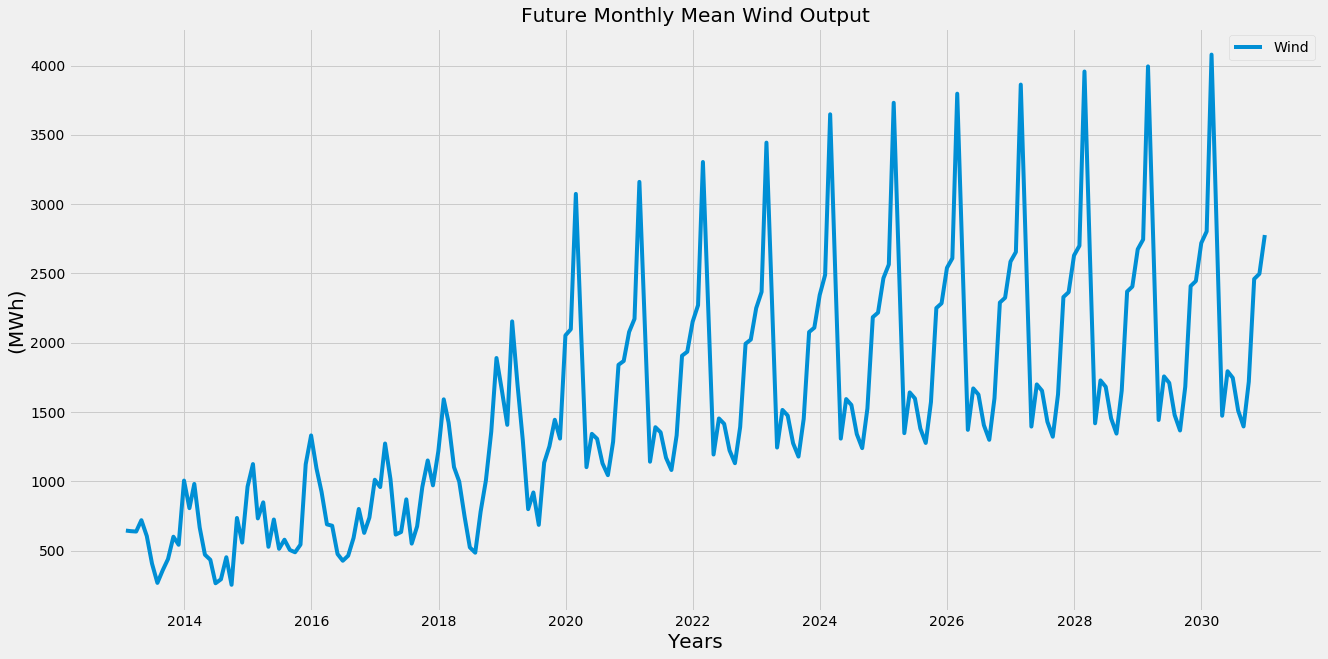

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df1['wind'].resample('M').mean())
plt.legend(labels=['Wind'])
plt.title('Future Monthly Mean Wind Output')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

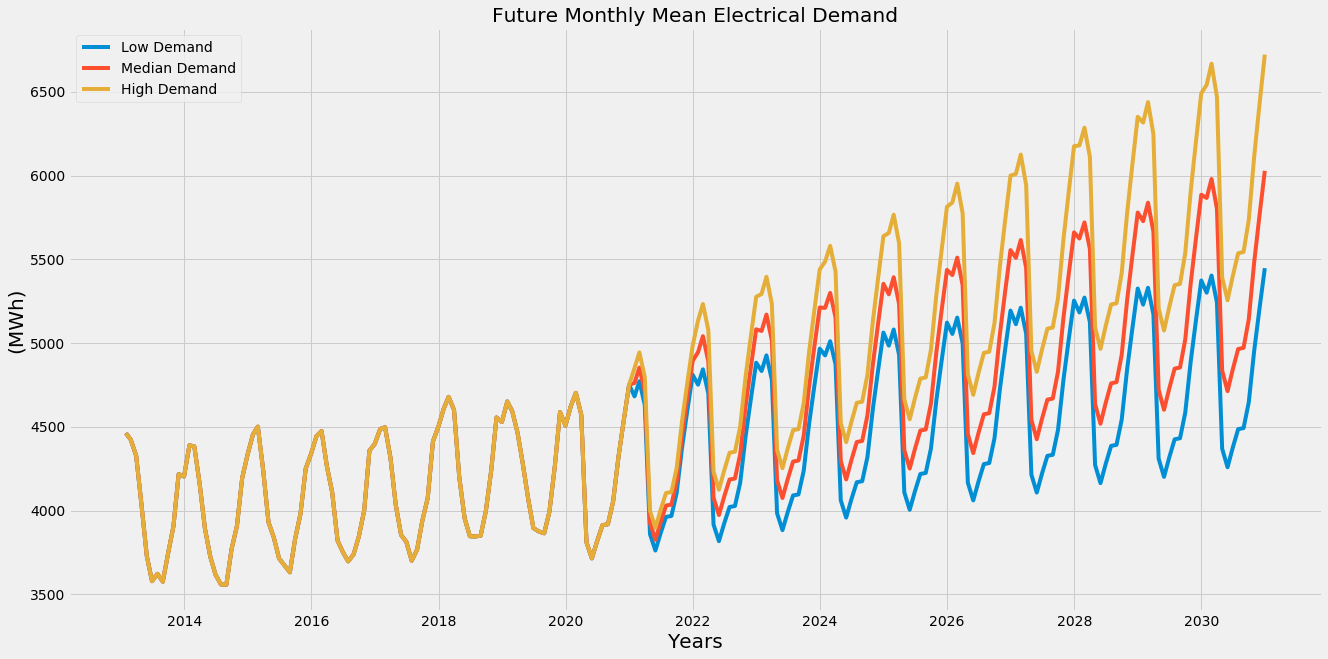

In [22]:
plt.figure(figsize=(20,10))
plt.plot(df1['low demand'].resample('M').mean())
plt.plot(df1['median demand'].resample('M').mean())
plt.plot(df1['high demand'].resample('M').mean())
plt.legend(labels=['Low Demand', 'Median Demand','High Demand'])
plt.title('Future Monthly Mean Electrical Demand')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

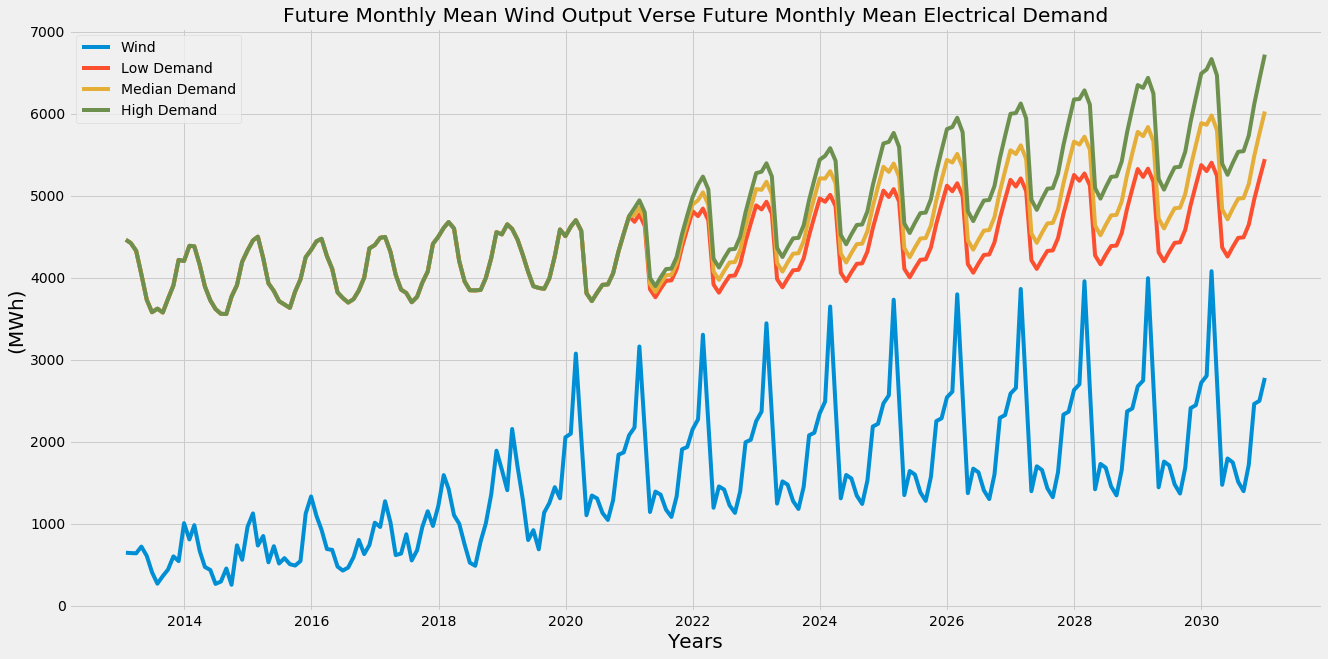

In [23]:
plt.figure(figsize=(20,10))
# plt.plot(df1['wind'].resample('M').mean())
# plt.plot(df1['low demand'].resample('M').mean())
# plt.plot(df1['median demand'].resample('M').mean())
# plt.plot(df1['high demand'].resample('M').mean())
plt.plot(df1.resample('M').mean())
plt.legend(labels=['Wind','Low Demand', 'Median Demand','High Demand'])
plt.title('Future Monthly Mean Wind Output Verse Future Monthly Mean Electrical Demand')
plt.xlabel('Years', size =20)
plt.ylabel('(MWh)',size=20)

plt.show()

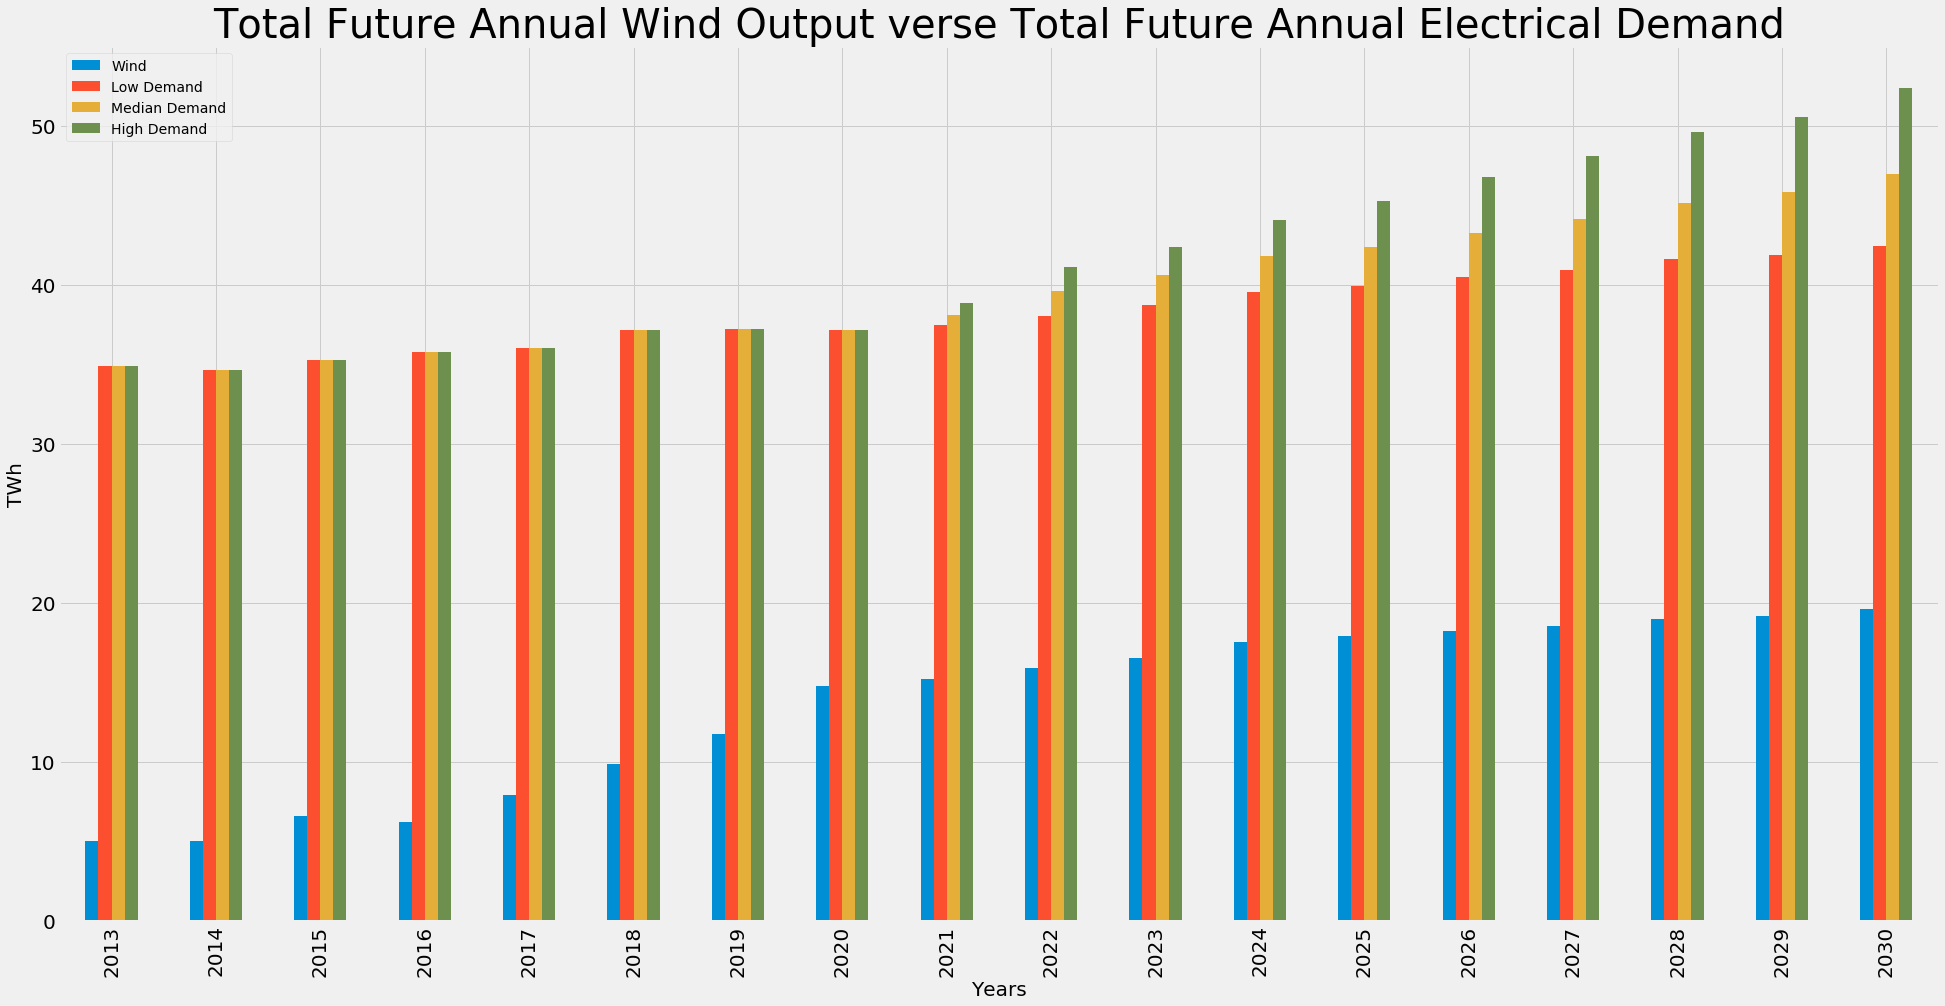

In [24]:
(df1.groupby(df1.index.year).sum()/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Total Future Annual Wind Output verse Total Future Annual Electrical Demand', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);
plt.legend(labels=['Wind','Low Demand', 'Median Demand','High Demand'])

In [25]:
df1

wind   low demand  median demand  high demand
date                                                                     
2013-01-01 00:00:00  1042.239000  3803.080000    3803.080000  3803.080000
2013-01-01 01:00:00  1092.219000  3518.080000    3518.080000  3518.080000
2013-01-01 02:00:00  1140.414000  3221.360000    3221.360000  3221.360000
2013-01-01 03:00:00  1175.463000  2994.740000    2994.740000  2994.740000
2013-01-01 04:00:00  1173.676000  2900.830000    2900.830000  2900.830000
...                          ...          ...            ...          ...
2030-12-31 19:00:00  2811.135582  6743.171918    7462.383448  8321.473504
2030-12-31 20:00:00  2742.682013  6341.996235    7018.419269  7826.398951
2030-12-31 21:00:00  2636.921362  5964.866993    6601.066272  7360.999132
2030-12-31 22:00:00  2511.155155  5459.665856    6041.981520  6737.551009
2030-12-31 23:00:00  2634.727929  4977.102127    5507.948630  6142.038788

[157776 rows x 4 columns]

In [26]:
round(df1.groupby(df1.index.year).sum()/(1000000),3)

wind  low demand  median demand  high demand
date                                                
2013   5.012      34.893         34.893       34.893
2014   5.008      34.644         34.644       34.644
2015   6.608      35.297         35.297       35.297
2016   6.232      35.784         35.784       35.784
2017   7.928      36.042         36.042       36.042
2018   9.879      37.143         37.143       37.143
2019  11.748      37.248         37.248       37.248
2020  14.765      37.133         37.133       37.133
2021  15.200      37.494         38.134       38.845
2022  15.890      38.052         39.606       41.118
2023  16.562      38.707         40.620       42.392
2024  17.524      39.567         41.845       44.066
2025  17.944      39.920         42.372       45.306
2026  18.260      40.478         43.291       46.761
2027  18.576      40.944         44.118       48.126
2028  19.006      41.624         45.169       49.635
2029  19.207      41.878         45.869       50.587
2030  19.616      42.451         46.979       52.387

In [27]:
df_wp = pd.DataFrame(df1.index)


df1['WP Low Forecast'] = df1['wind' ]/df1['low demand' ]
df1['WP Median Forecast'] = df1['wind' ]/df1['median demand' ]
df1['WP High Forecast'] = df1['wind' ]/df1['high demand' ]

df_wp['WP Low Forecast'] = df1['WP Low Forecast'].tolist()
df_wp['WP Median Forecast'] = df1['WP Median Forecast'].tolist()
df_wp['WP High Forecast'] = df1['WP High Forecast'].tolist()

df_wp = df_wp.set_index('date')
df_wp

WP Low Forecast  WP Median Forecast  WP High Forecast
date                                                                      
2013-01-01 00:00:00         0.274051            0.274051          0.274051
2013-01-01 01:00:00         0.310459            0.310459          0.310459
2013-01-01 02:00:00         0.354016            0.354016          0.354016
2013-01-01 03:00:00         0.392509            0.392509          0.392509
2013-01-01 04:00:00         0.404600            0.404600          0.404600
...                              ...                 ...               ...
2030-12-31 19:00:00         0.416886            0.376707          0.337817
2030-12-31 20:00:00         0.432464            0.390783          0.350440
2030-12-31 21:00:00         0.442075            0.399469          0.358229
2030-12-31 22:00:00         0.459947            0.415618          0.372710
2030-12-31 23:00:00         0.529370            0.478350          0.428966

[157776 rows x 3 columns]

In [28]:
round(df_wp.groupby(df_wp.index.year).mean()*100,3)

WP Low Forecast  WP Median Forecast  WP High Forecast
date                                                       
2013           14.762              14.762            14.762
2014           14.737              14.737            14.737
2015           19.027              19.027            19.027
2016           17.845              17.845            17.845
2017           22.656              22.656            22.656
2018           26.780              26.780            26.780
2019           32.216              32.216            32.216
2020           40.455              40.455            40.455
2021           41.254              40.561            39.819
2022           42.494              40.827            39.326
2023           43.543              41.492            39.757
2024           45.061              42.609            40.461
2025           45.744              43.096            40.305
2026           45.906              42.923            39.739
2027           46.169              42.848            39.279
2028           46.458              42.812            38.960
2029           46.673              42.613            38.639
2030           47.024              42.492            38.105

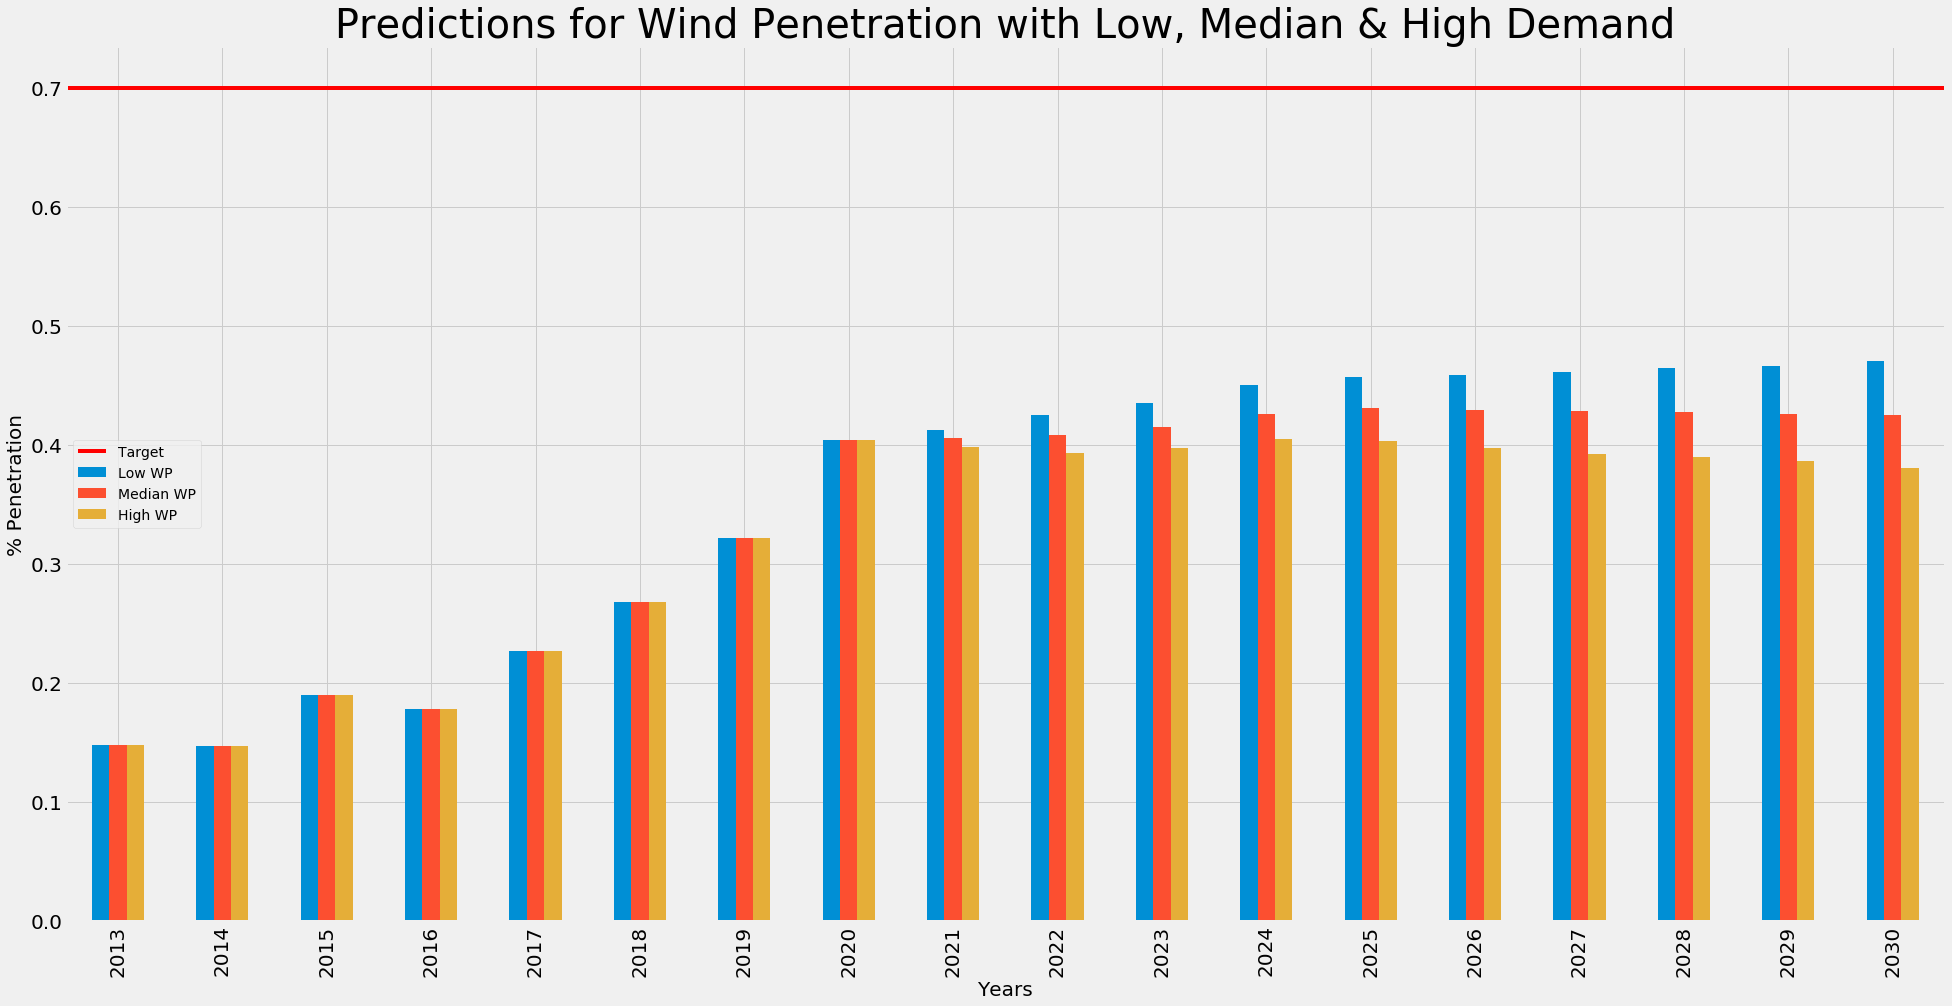

In [29]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for Wind Penetration with Low, Median & High Demand', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','Low WP', 'Median WP','High WP'])

# Sarima Model

### TheSARIMA Model is taken from Prabhakaran (n.d)

Prabhakaran, S. 'ARIMA Model - Complete Guide to Time Series Forecasting in Python'. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1178.412, Time=1.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1192.965, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1178.648, Time=0.43 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1177.130, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1213.500, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1189.631, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1178.986, Time=0.69 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1178.971, Time=1.97 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1178.664, Time=0.33 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1181.030, Time=1.40 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1185.876, Time=0.31 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1178.476, Time=0.63 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1176.569, Time=0.41 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1190.622, Time=0.05 sec
 ARIMA(1,0,0)(1,1,1

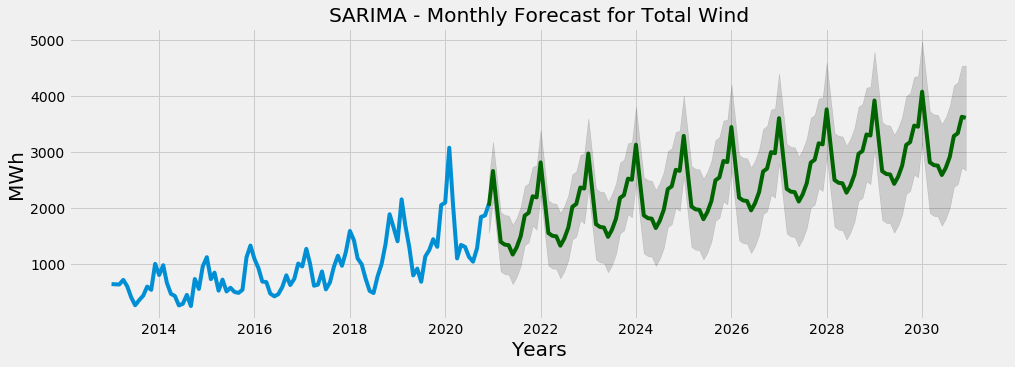

In [30]:
import pmdarima as pm # for arima, may need to pip install

df_forecast = pd.DataFrame()


dfm = (df[['Total_Wind_Fcast']]).dropna()
dfm =dfm.resample('MS').mean()             

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(dfm, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

# Forecast
n_periods = 121
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dfm.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#Next Year Sales
print('\n')
print("Next year sales are")
print(fitted_series)

valuelist = []
datelist = []
for i in range(0,len(dfm)):
    valuelist.append(dfm['Total_Wind_Fcast'].iloc[i])
    datelist.append(dfm.index[i])

for i in range(0,len(fitted_series)):
    valuelist.append(fitted_series.iloc[i])
    datelist.append(fitted_series.index[i])

df_forecast['date'] = datelist
df_forecast['Total_Wind_Fcast'] = valuelist
df_forecast = df_forecast.set_index('date')


# Plot
plt.figure(figsize=(15,5))
plt.plot(dfm)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Years', size =20)
plt.ylabel('MWh',size=20)
plt.title("SARIMA - Monthly Forecast for Total Wind" )
plt.show()

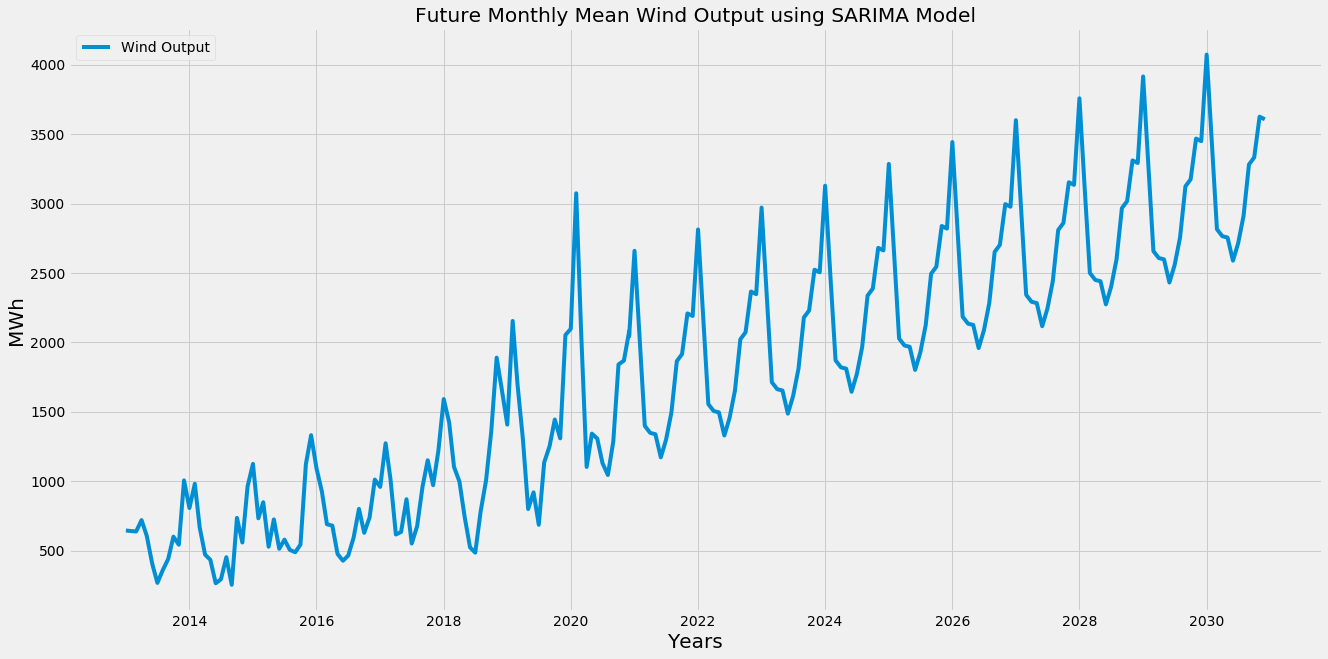

In [31]:
plt.figure(figsize=(20,10))
plt.plot(df_forecast['Total_Wind_Fcast'])

plt.xlabel('Years', size =20)
plt.ylabel('MWh',size=20)
plt.legend(labels=['Wind Output'])
plt.title('Future Monthly Mean Wind Output using SARIMA Model')

plt.show()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1012.865, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=997.177, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=987.069, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1005.445, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=986.282, Time=0.34 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=990.512, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=985.006, Time=1.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=984.024, Time=0.61 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=993.325, Time=0.25 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=979.342, Time=1.10 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=984.503, Time=0.53 sec
 ARIMA(0,1,2)(2,1,1)[12]             : AIC=979.373, Time=0.88 sec
 ARIMA(0,1,2)(1,1,1)[12]             : 

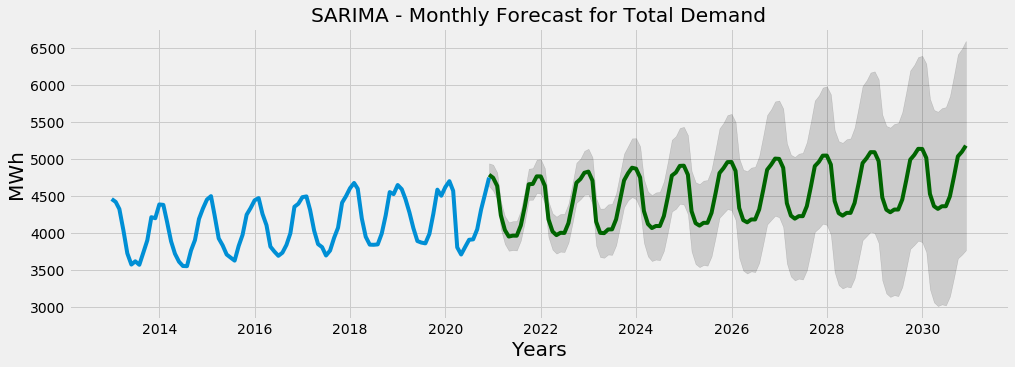

In [32]:
dfm = (df[['Total_Demand_Fcast']]).dropna()
dfm =dfm.resample('MS').mean()             

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(dfm, start_p=1, start_q=1,
                         test='adf',
                         max_p=5, max_q=5, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

# Forecast
n_periods = 121
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dfm.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

#Next Year Sales
print('\n')
print("Next year sales are")
print(fitted_series)

valuelist = []
datelist = []
for i in range(0,len(dfm)):
    valuelist.append(dfm['Total_Demand_Fcast'].iloc[i])
    datelist.append(dfm.index[i])

for i in range(0,len(fitted_series)):
    valuelist.append(fitted_series.iloc[i])
    datelist.append(fitted_series.index[i])

df_forecast['date'] = datelist
df_forecast['Total_Demand_Fcast'] = valuelist
df_forecast = df_forecast.set_index('date')

# Plot
plt.figure(figsize=(15,5))
plt.plot(dfm)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.xlabel('Years', size =20)
plt.ylabel('MWh',size=20)
plt.title("SARIMA - Monthly Forecast for Total Demand" )
plt.show()

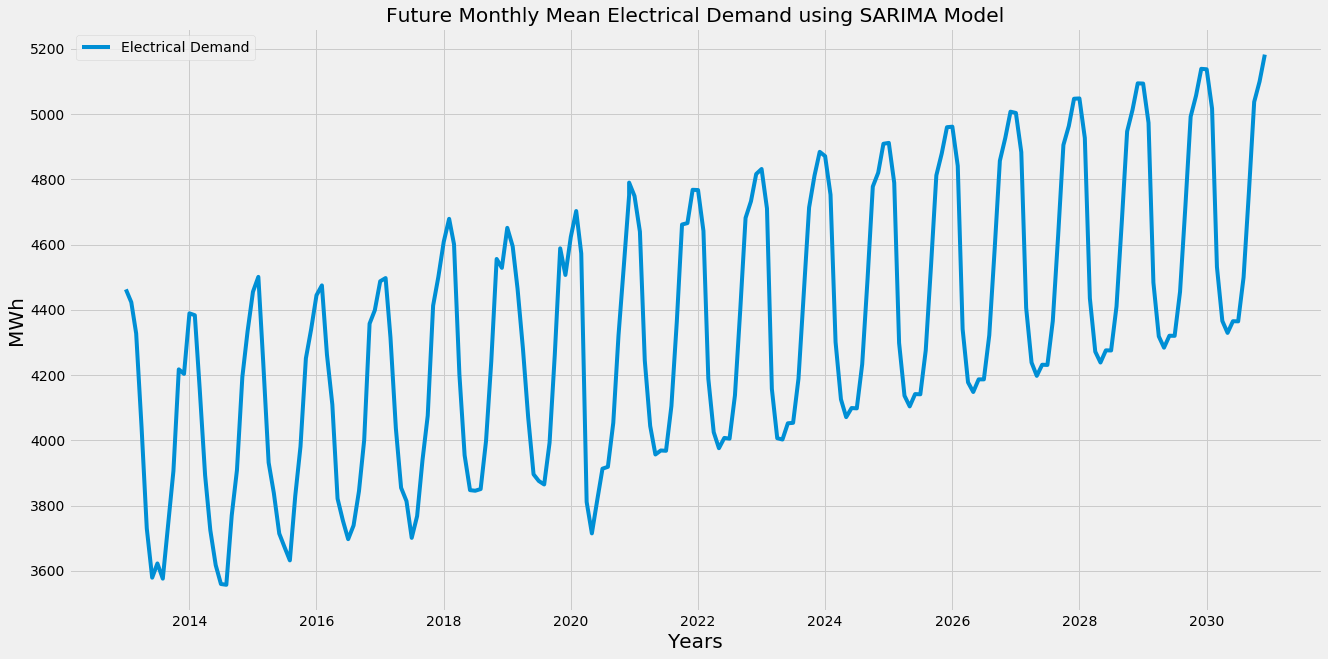

In [33]:
plt.figure(figsize=(20,10))
plt.plot(df_forecast['Total_Demand_Fcast'])
plt.xlabel('Years', size =20)
plt.ylabel('MWh',size=20)
plt.legend(labels=['Electrical Demand'])
plt.title('Future Monthly Mean Electrical Demand using SARIMA Model')


plt.show()

In [34]:
df_forecast

Total_Wind_Fcast  Total_Demand_Fcast
date                                            
2013-01-01        644.550841         4462.682970
2013-02-01        640.355269         4423.224762
2013-03-01        637.626927         4327.609099
2013-04-01        719.401181         4040.377287
2013-05-01        605.297782         3729.719714
...                      ...                 ...
2030-08-01       2912.304763         4499.464768
2030-09-01       3281.714085         4763.551781
2030-10-01       3332.392742         5037.457881
2030-11-01       3625.786503         5100.031826
2030-12-01       3607.162327         5182.445110

[217 rows x 2 columns]

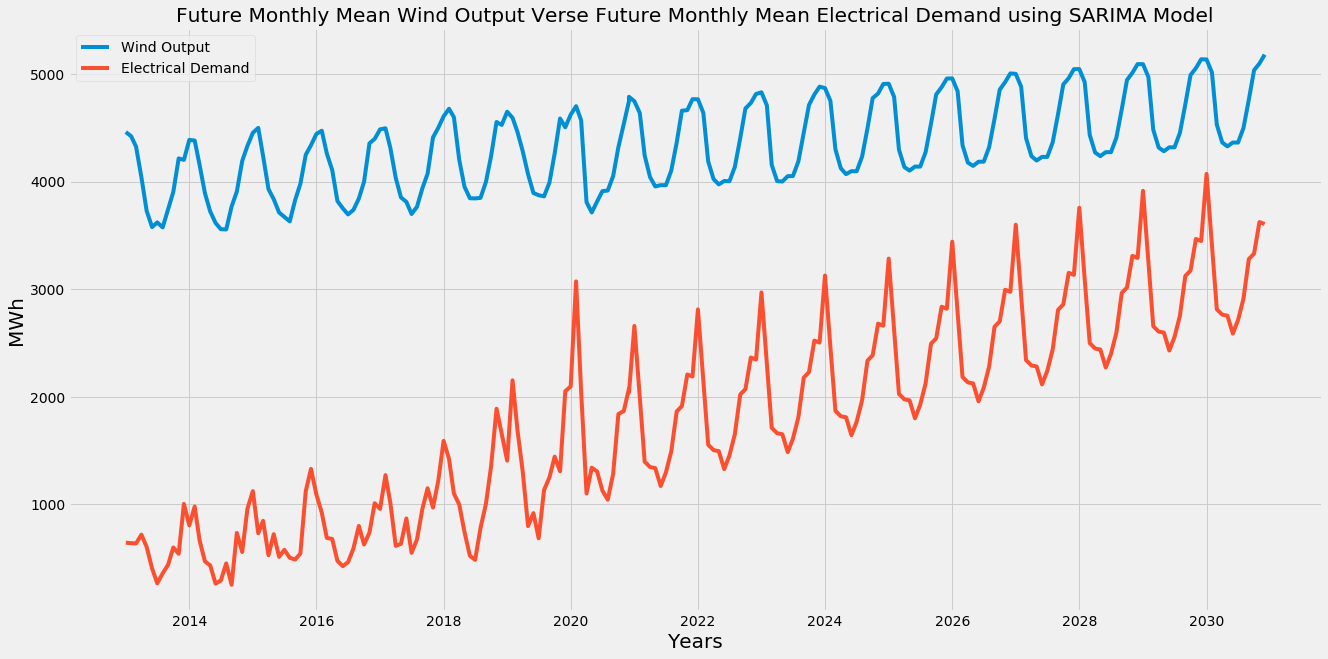

In [35]:
plt.figure(figsize=(20,10))
plt.plot(df_forecast['Total_Demand_Fcast'])
plt.plot(df_forecast['Total_Wind_Fcast'])

plt.xlabel('Years', size =20)
plt.ylabel('MWh',size=20)
plt.legend(labels=['Wind Output','Electrical Demand'])
plt.title('Future Monthly Mean Wind Output Verse Future Monthly Mean Electrical Demand using SARIMA Model')

plt.show()

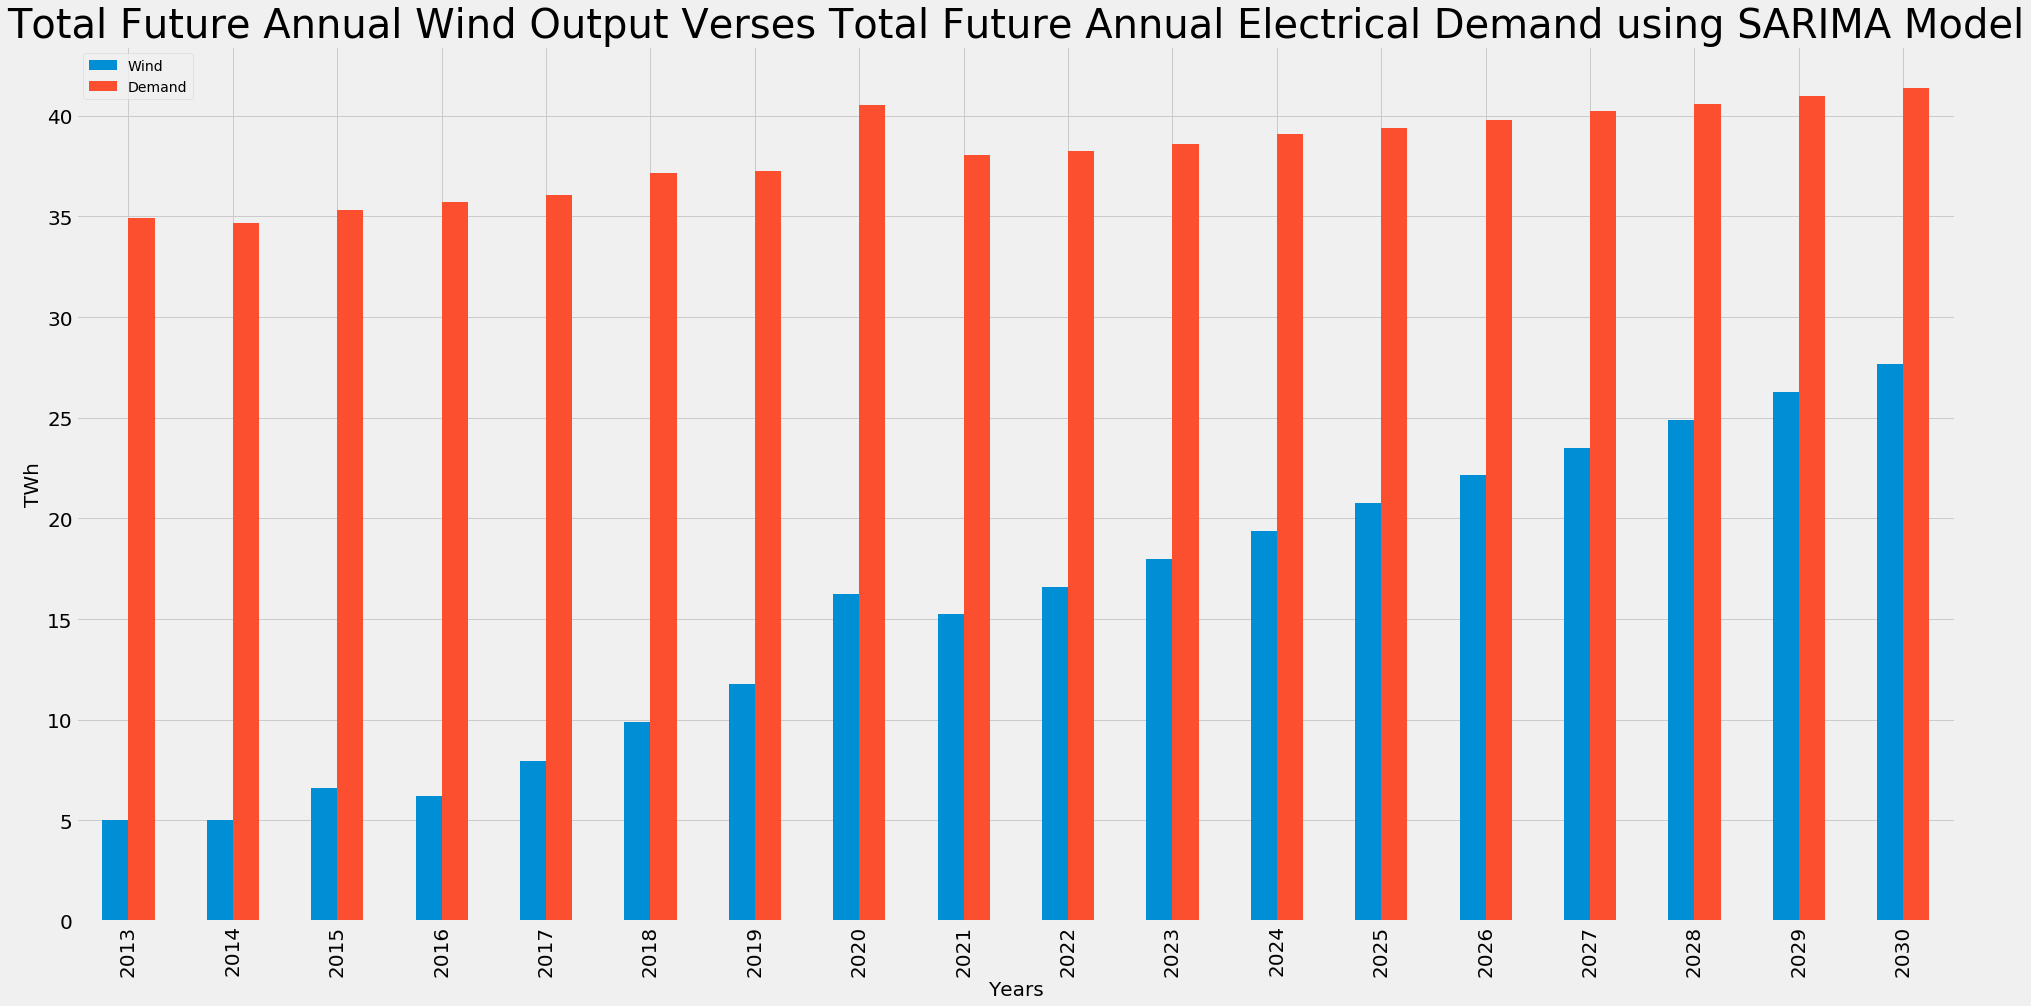

In [36]:
(df_forecast.groupby(df_forecast.index.year).sum() * (8760/12)/(1000000)).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Total Future Annual Wind Output Verses Total Future Annual Electrical Demand using SARIMA Model', size =40)
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('TWh',size=20)
plt.yticks(size=20);
plt.legend(labels=['Wind','Demand'])

In [37]:
round( (df_forecast.groupby(df_forecast.index.year).sum() * (8760/12)/(1000000)), 3)

Total_Wind_Fcast  Total_Demand_Fcast
date                                      
2013             5.013              34.916
2014             5.019              34.666
2015             6.597              35.321
2016             6.221              35.699
2017             7.949              36.063
2018             9.898              37.165
2019            11.791              37.266
2020            16.253              40.535
2021            15.242              38.058
2022            16.617              38.240
2023            17.997              38.592
2024            19.376              39.096
2025            20.755              39.413
2026            22.135              39.816
2027            23.514              40.225
2028            24.894              40.596
2029            26.273              40.994
2030            27.653              41.386

In [38]:
df_wp = pd.DataFrame(df_forecast.index)
df_forecast['WP Forecast'] = df_forecast['Total_Wind_Fcast' ]/df_forecast['Total_Demand_Fcast' ]
df_wp['WP Forecast'] = df_forecast['WP Forecast'].tolist()
df_wp = df_wp.set_index('date')
df_wp

WP Forecast
date                   
2013-01-01     0.144431
2013-02-01     0.144771
2013-03-01     0.147339
2013-04-01     0.178053
2013-05-01     0.162290
...                 ...
2030-08-01     0.647256
2030-09-01     0.688922
2030-10-01     0.661523
2030-11-01     0.710934
2030-12-01     0.696035

[217 rows x 1 columns]

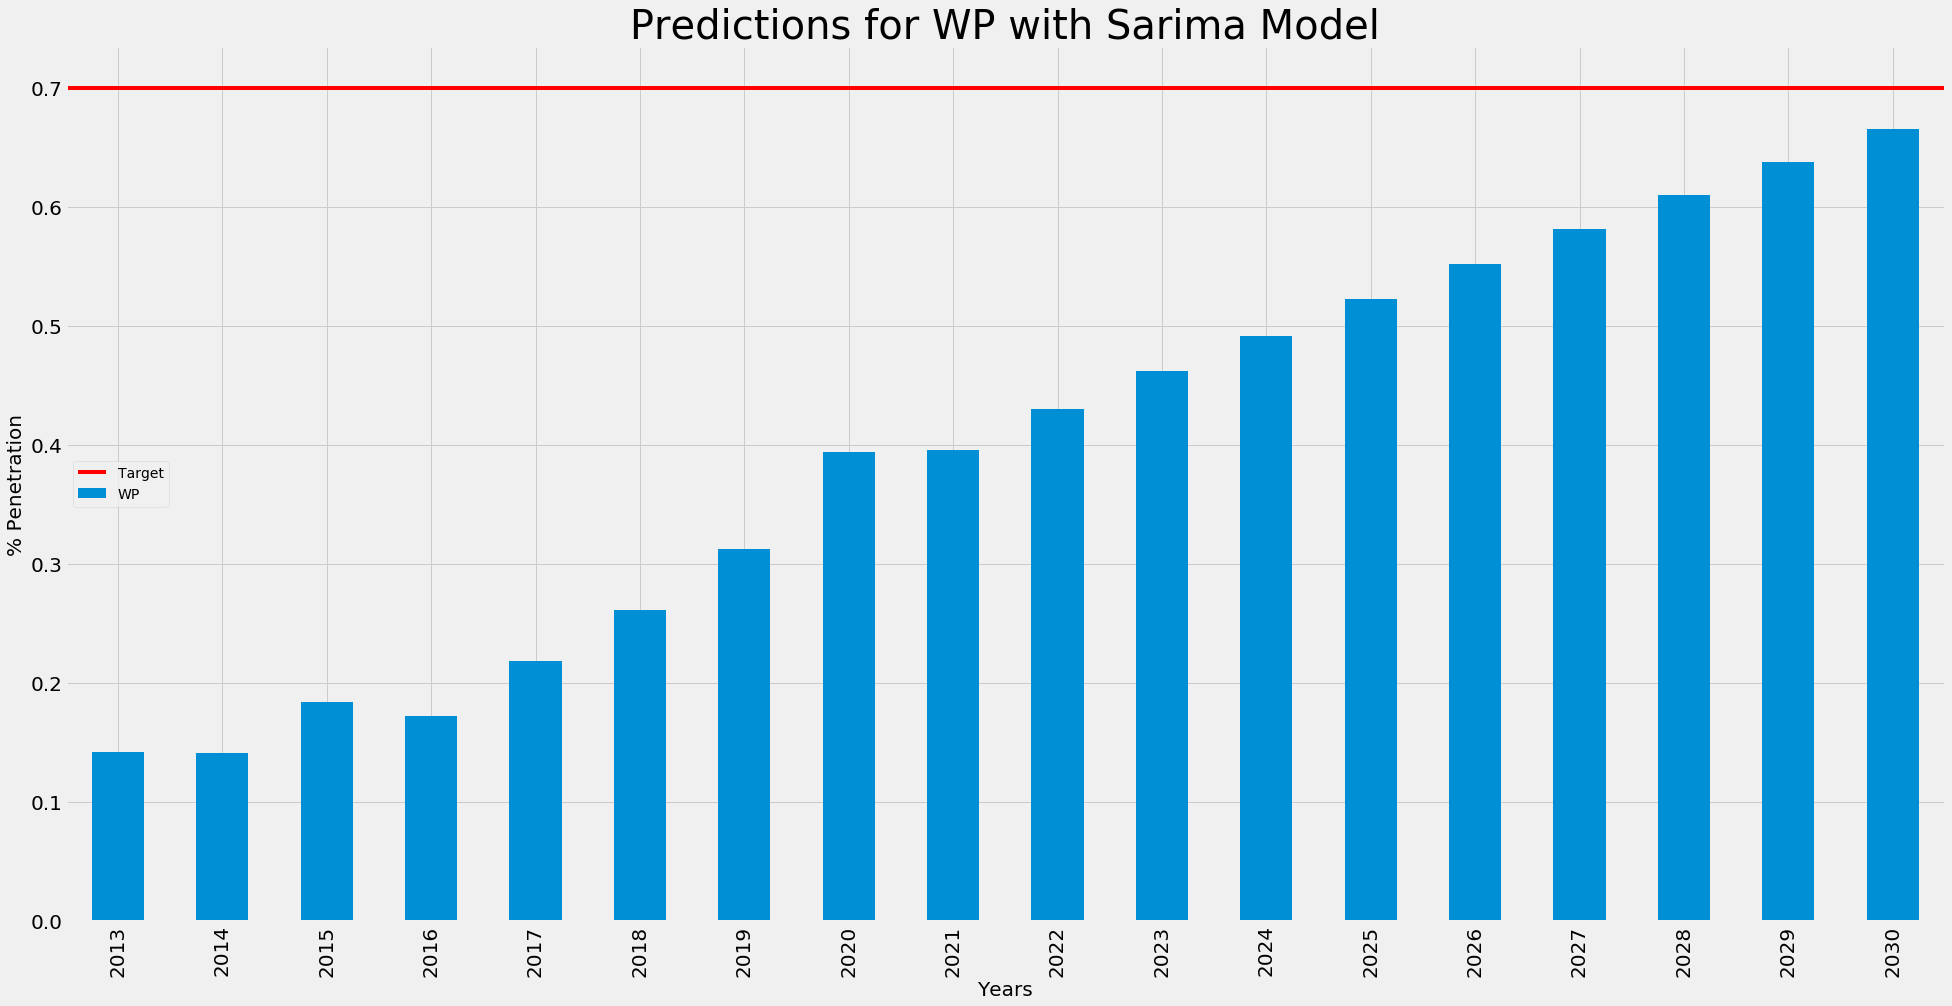

In [39]:
(df_wp.groupby(df_wp.index.year).mean()).plot(kind="bar", figsize=(30,15))
matplotlib.style.use('fivethirtyeight') 
plt.title('Predictions for WP with Sarima Model', size =40)
plt.axhline(y=0.7, color='r', linestyle='-')
plt.xlabel('Years', size =20)
plt.xticks(size=20);
plt.ylabel('% Penetration',size=20)
plt.yticks(size=20);
plt.legend(labels=['Target','WP'])

In [40]:
round(df_wp.groupby(df_wp.index.year).mean()*100,3)

WP Forecast
date             
2013       14.194
2014       14.148
2015       18.394
2016       17.215
2017       21.842
2018       26.101
2019       31.254
2020       39.408
2021       39.565
2022       42.983
2023       46.176
2024       49.143
2025       52.263
2026       55.218
2027       58.105
2028       60.990
2029       63.780
2030       66.525

### The Multivariable Polynomial Regression is taken from Ahmed (2020)

Ahmed, M. 'Polynomial Regression in Python, Step-by-step follow along|Data Science|Episode 4.7',28th August 2020. https://ai.plainenglish.io/implementing-polynomial-regression-in-python-d9aedf520d56


### Degree = 1 

In [41]:
X = np.array(df[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(df.DA_Prices)


# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
pre_process = PolynomialFeatures(degree=1)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 1
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_
theta0, theta1, theta2 

(0.78801393298383, -0.005836728870607141, 0.011676894625327474)

In [42]:
df_d1= pd.DataFrame(df1.index)
df_d1 = df_d1.set_index('date')
newlist = []
wd = df1['wind']
dmd = df1['low demand']


for i in range(0,len(df1)):

    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Low Demand 1 degree'] = newlist

newlist = []
wd = df1['wind']
dmd = df1['median demand']


for i in range(0,len(df1)):

    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on Median Demand 1 degree'] = newlist

newlist = []
wd = df1['wind']
dmd = df1['high demand']


for i in range(0,len(df1)):

    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1['DA Ahead on High Demand 1 degree'] = newlist


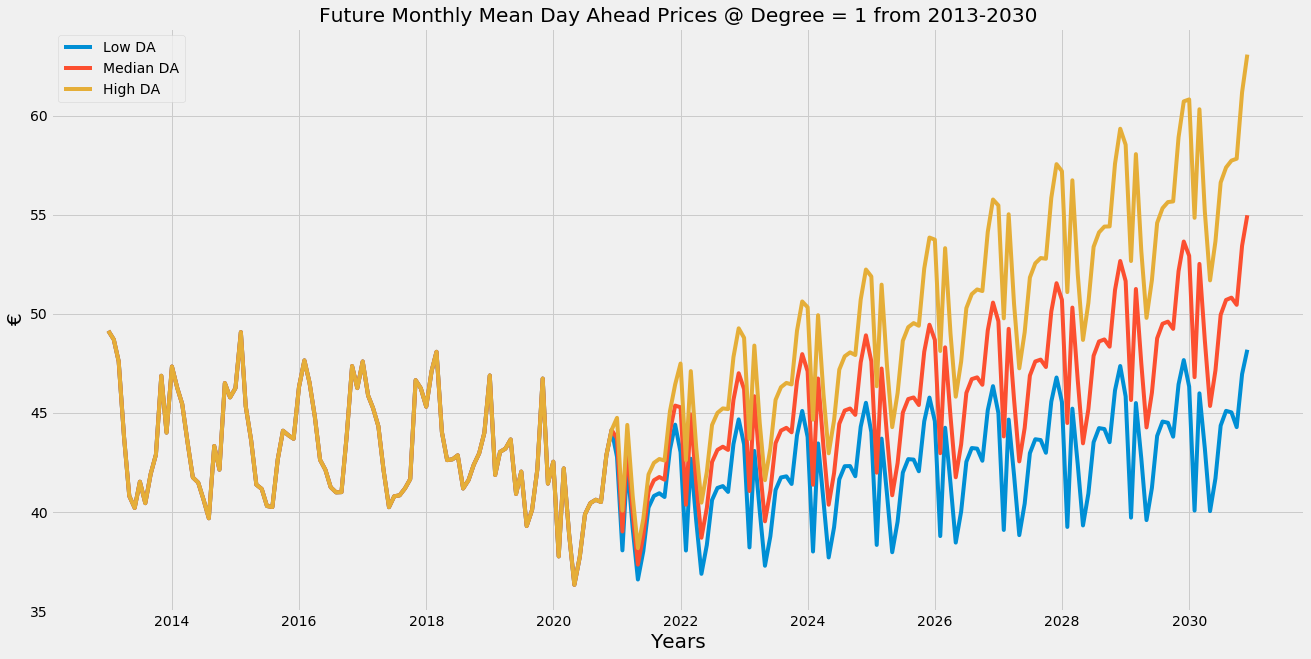

In [43]:
df_d1 = df_d1.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1['DA Ahead on Low Demand 1 degree'])
plt.plot(df_d1['DA Ahead on Median Demand 1 degree'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree'])
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from 2013-2030')

plt.show()

### Degree = 2

In [44]:
X = np.array(df[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(df.DA_Prices)

 
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 2
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5

(50.37663226776066,
 -0.005430880943207174,
 -0.013390271739814594,
 -1.044590586389213e-06,
 6.275458023553577e-07,
 2.9633770316757693e-06)

In [45]:
df_d2= pd.DataFrame(df1.index)
df_d2 = df_d2.set_index('date')

newlist = []
wd = df1['wind']
dmd = df1['low demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2['DA Ahead on Low Demand 2 degree'] = newlist


newlist = []
wd = df1['wind']
dmd = df1['median demand']


for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2['DA Ahead on Median Demand 2 degree'] = newlist


newlist = []
wd = df1['wind']
dmd = df1['high demand']


for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2['DA Ahead on High Demand 2 degree'] = newlist

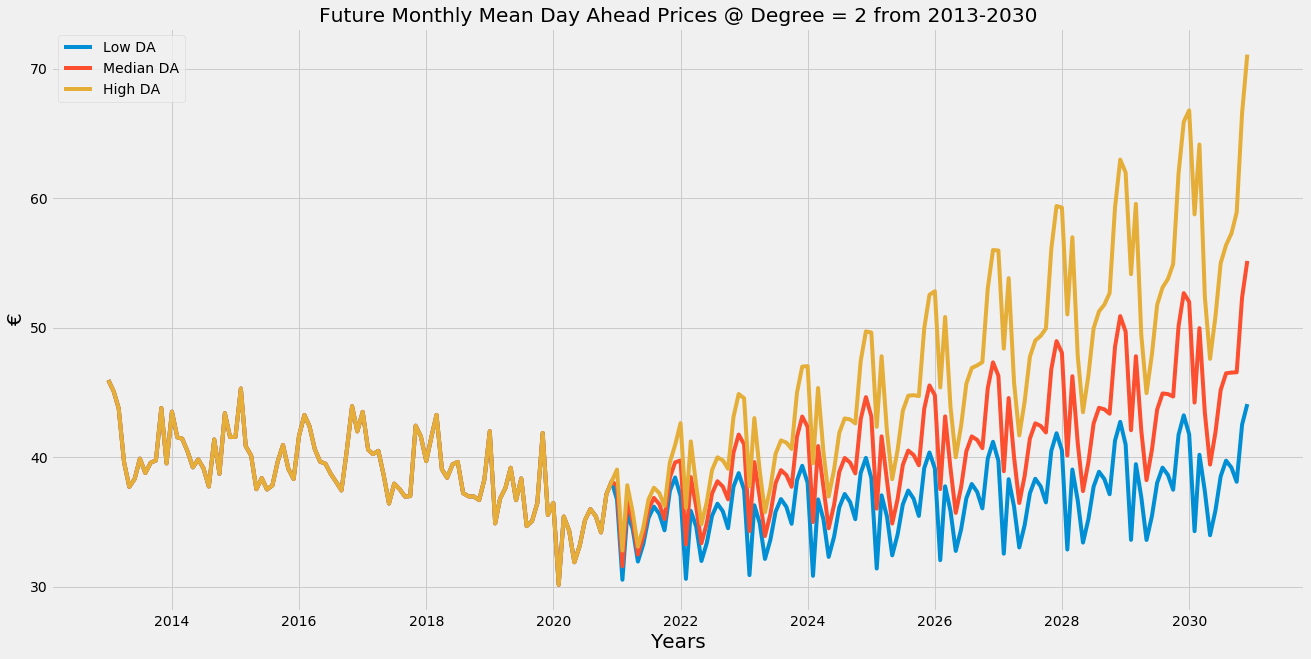

In [46]:
df_d2 = df_d2.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2['DA Ahead on Low Demand 2 degree'])
plt.plot(df_d2['DA Ahead on Median Demand 2 degree'])
plt.plot(df_d2['DA Ahead on High Demand 2 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from 2013-2030')
plt.show()

### Degree = 3

In [47]:
X = np.array(df[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(df.DA_Prices)

pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 3
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9

(-133.3616796417149,
 -0.0371328355328834,
 0.1329193342054633,
 -9.296723711418173e-06,
 2.265293787485346e-05,
 -3.521579624961594e-05,
 -7.277724646884143e-10,
 2.870182600270277e-09,
 -3.614438734422798e-09,
 3.2753256842821266e-09)

In [48]:
df_d3= pd.DataFrame(df1.index)
df_d3 = df_d3.set_index('date')

newlist = []
wd = df1['wind']
dmd = df1['low demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on Low Demand 3 degree'] = newlist


newlist = []
wd = df1['wind']
dmd = df1['median demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on Median Demand 3 degree'] = newlist

newlist = []
wd = df1['wind']
dmd = df1['high demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on High Demand 3 degree'] = newlist

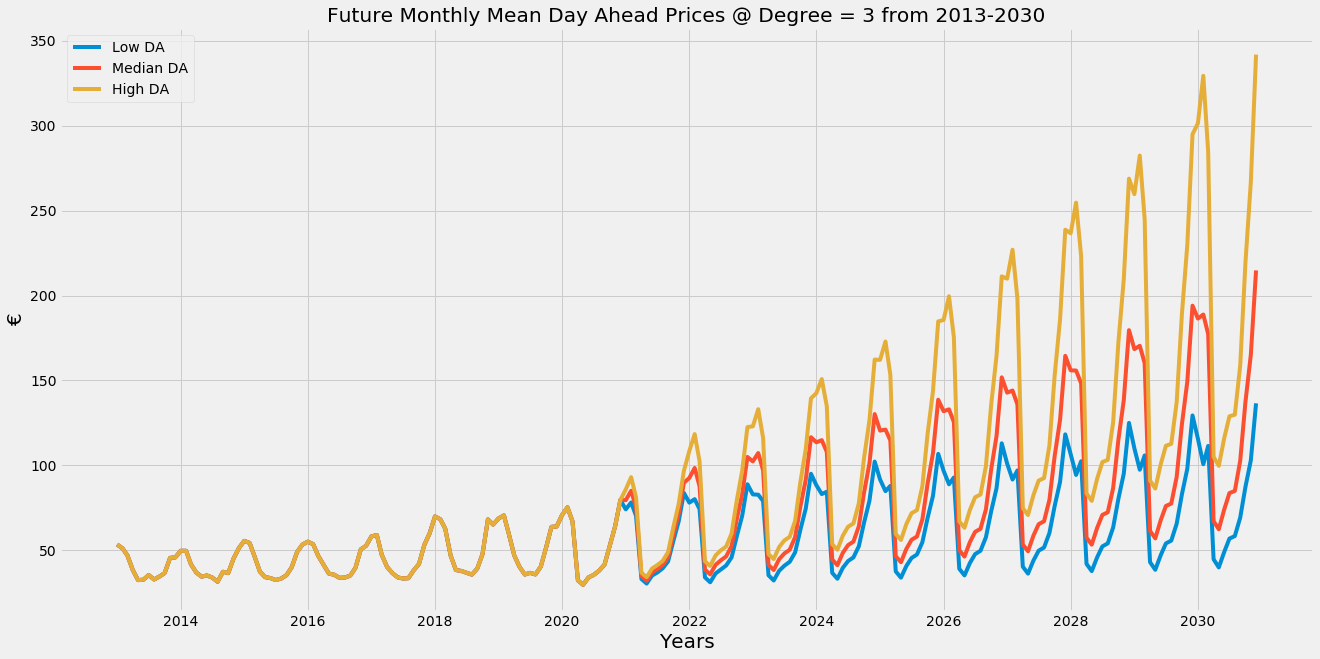

In [49]:
df_d3 = df_d3.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3['DA Ahead on Low Demand 3 degree'])
plt.plot(df_d3['DA Ahead on Median Demand 3 degree'])
plt.plot(df_d3['DA Ahead on High Demand 3 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from 2013-2030')

plt.show()

### Degree = 4

In [50]:
X = np.array(df[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(df.DA_Prices)

pre_process = PolynomialFeatures(degree=4)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 4
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14

(-80.3601080516975,
 0.021264268508020018,
 0.06610488136383197,
 -9.722156373107889e-06,
 -2.0965411220034397e-05,
 -5.5410436101027565e-06,
 2.698707047701255e-09,
 -8.222789151143668e-10,
 8.002882094727338e-09,
 -2.3353310816005174e-09,
 -3.8406192288953367e-13,
 -1.0480852297156673e-13,
 4.811030046569797e-13,
 -9.971849734835558e-13,
 3.8199304830399683e-13)

In [51]:
df_d4= pd.DataFrame(df1.index)
df_d4 = df_d4.set_index('date')

newlist = []
wd = df1['wind']
dmd = df1['low demand']


for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4['DA Ahead on Low Demand 4 degree'] = newlist

newlist = []
wd = df1['wind']
dmd = df1['median demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4['DA Ahead on Median Demand 4 degree'] = newlist


newlist = []
wd = df1['wind']
dmd = df1['high demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4['DA Ahead on High Demand 4 degree'] = newlist

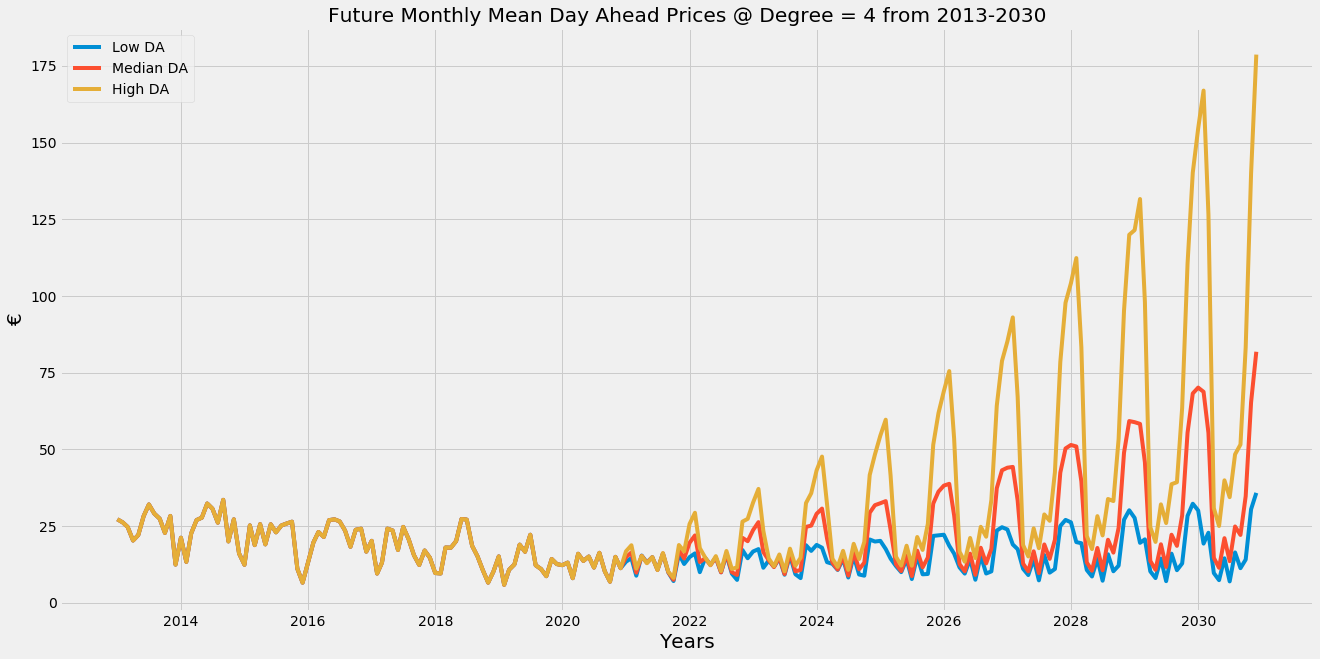

In [52]:
df_d4 = df_d4.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4['DA Ahead on Low Demand 4 degree'])
plt.plot(df_d4['DA Ahead on Median Demand 4 degree'])
plt.plot(df_d4['DA Ahead on High Demand 4 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from 2013-2030')

plt.show()

# All Degrees Plotted

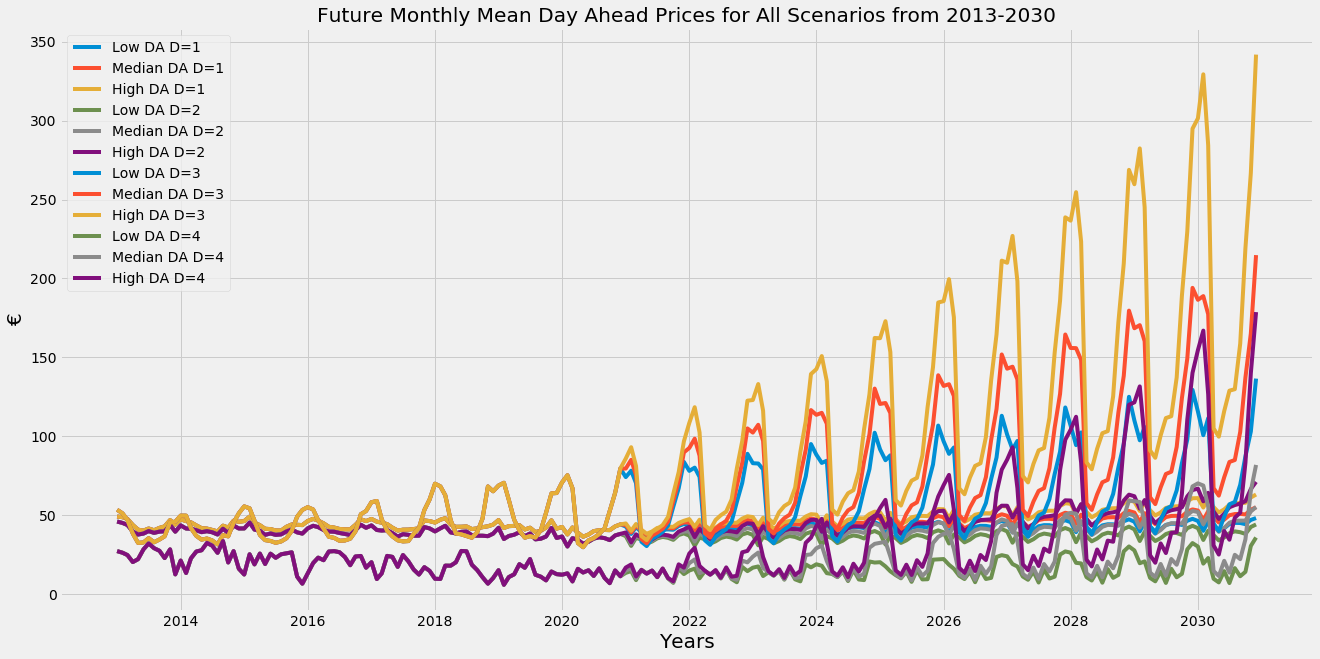

In [53]:
plt.figure(figsize=(20,10))


plt.plot(df_d1['DA Ahead on Low Demand 1 degree'])
plt.plot(df_d1['DA Ahead on Median Demand 1 degree'])
plt.plot(df_d1['DA Ahead on High Demand 1 degree'])

plt.plot(df_d2['DA Ahead on Low Demand 2 degree'])
plt.plot(df_d2['DA Ahead on Median Demand 2 degree'])
plt.plot(df_d2['DA Ahead on High Demand 2 degree'])

plt.plot(df_d3['DA Ahead on Low Demand 3 degree'])
plt.plot(df_d3['DA Ahead on Median Demand 3 degree'])
plt.plot(df_d3['DA Ahead on High Demand 3 degree'])

plt.plot(df_d4['DA Ahead on Low Demand 4 degree'])
plt.plot(df_d4['DA Ahead on Median Demand 4 degree'])
plt.plot(df_d4['DA Ahead on High Demand 4 degree'])


plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2'])

plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2',
                   'Low DA D=3', 'Median DA D=3','High DA D=3'])



plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2',
                   'Low DA D=3', 'Median DA D=3','High DA D=3',
                   'Low DA D=4', 'Median DA D=4','High DA D=4'])

plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices for All Scenarios from 2013-2030')

plt.show()

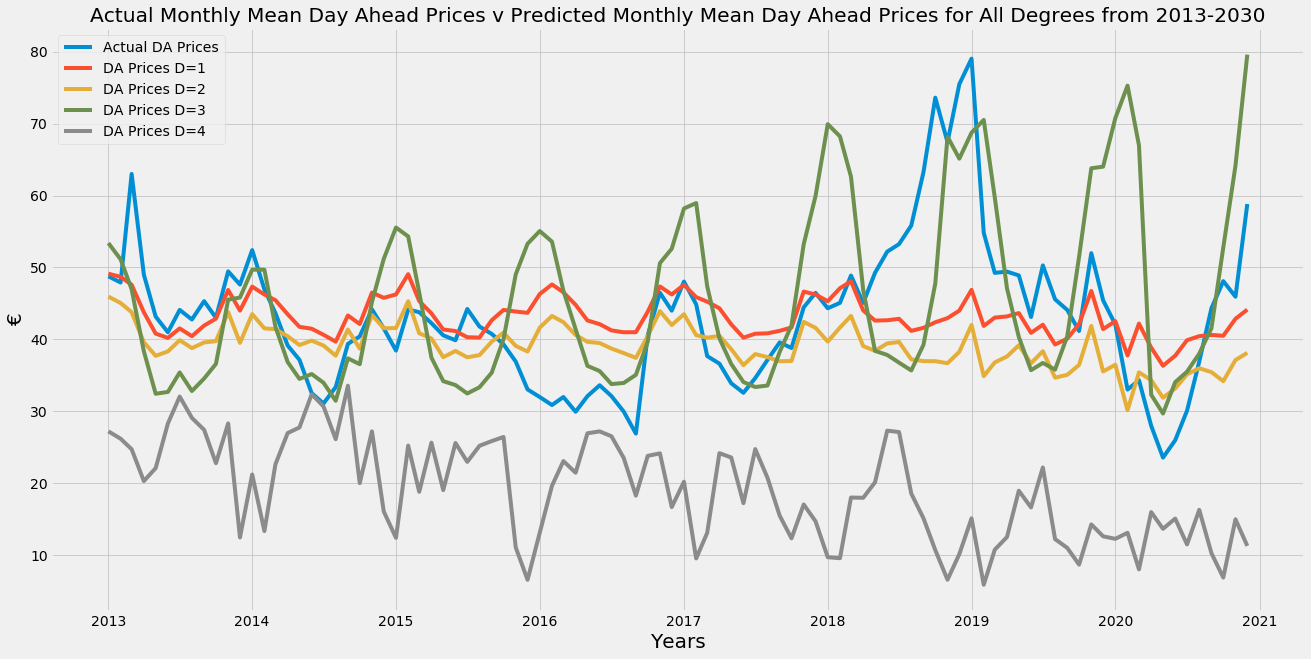

In [54]:
plt.figure(figsize=(20,10))


plt.plot(df['DA_Prices'].resample('MS').mean())

plt.plot(df_d1['DA Ahead on High Demand 1 degree'].loc[df_d1.index < dt.datetime(2021,1,1)])

plt.plot(df_d2['DA Ahead on High Demand 2 degree'].loc[df_d2.index < dt.datetime(2021,1,1)])

plt.plot(df_d3['DA Ahead on High Demand 3 degree'].loc[df_d3.index < dt.datetime(2021,1,1)])

plt.plot(df_d4['DA Ahead on High Demand 4 degree'].loc[df_d4.index < dt.datetime(2021,1,1)])

plt.legend(labels=['Actual DA Prices', 'DA Prices D=1','DA Prices D=2',
                   'DA Prices D=3','DA Prices D=4'])

plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Actual Monthly Mean Day Ahead Prices v Predicted Monthly Mean Day Ahead Prices for All Degrees from 2013-2030')

plt.show()

In [55]:
df_corr = pd.DataFrame()

df_corr['Actual'] = (df['DA_Prices'].resample('MS').mean()).tolist()

df_corr['D=1'] = (df_d1['DA Ahead on High Demand 1 degree'].loc[df_d1.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=2'] = (df_d2['DA Ahead on High Demand 2 degree'].loc[df_d2.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=3'] = (df_d3['DA Ahead on High Demand 3 degree'].loc[df_d3.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=4'] = (df_d4['DA Ahead on High Demand 4 degree'].loc[df_d4.index < dt.datetime(2021,1,1)]).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.343150
D=2       0.197999
D=3       0.423872
D=4      -0.211870
Name: Actual, dtype: float64

### Data starts from beginning of I-SEM, 1/10/2018

In [56]:
dfA = df.copy()
dfA = dfA.loc[dfA.index >= dt.datetime(2018,1,1)]

df1A = df1.copy()
df1A = df1A.loc[df1A.index >= dt.datetime(2018,1,1)]

### Degree = 1

In [57]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=1)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 1
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_
theta0, theta1, theta2 

(-5.351520616057492, -0.00989827113878432, 0.0158203155821)

In [58]:
df_d1A= pd.DataFrame(df1A.index)
df_d1A = df_d1A.set_index('date')
newlist = []
wd = df1A['wind']
dmd = df1A['low demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on Low Demand 1 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on Median Demand 1 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on High Demand 1 degree'] = newlist

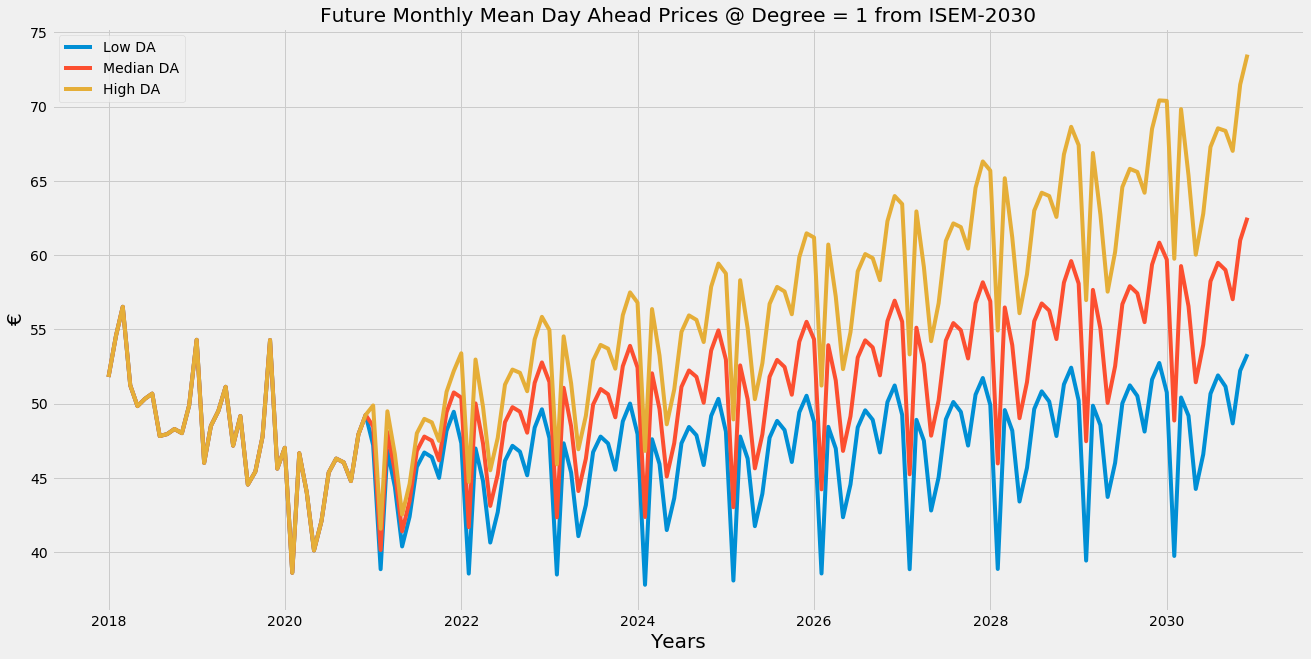

In [59]:
df_d1A = df_d1A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d1A['DA Ahead on Low Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on Median Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on High Demand 1 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030')

plt.show()

### Degree = 2

In [60]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 2
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5

(61.30846597569776,
 -0.007509648751771861,
 -0.0172838531522913,
 -6.728886718198983e-07,
 -1.9988365409021047e-08,
 3.8803461070418405e-06)

In [61]:
df_d2A= pd.DataFrame(df1A.index)
df_d2A = df_d2A.set_index('date')

newlist = []
wd = df1A['wind']
dmd = df1A['low demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Low Demand 2 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree'] = newlist

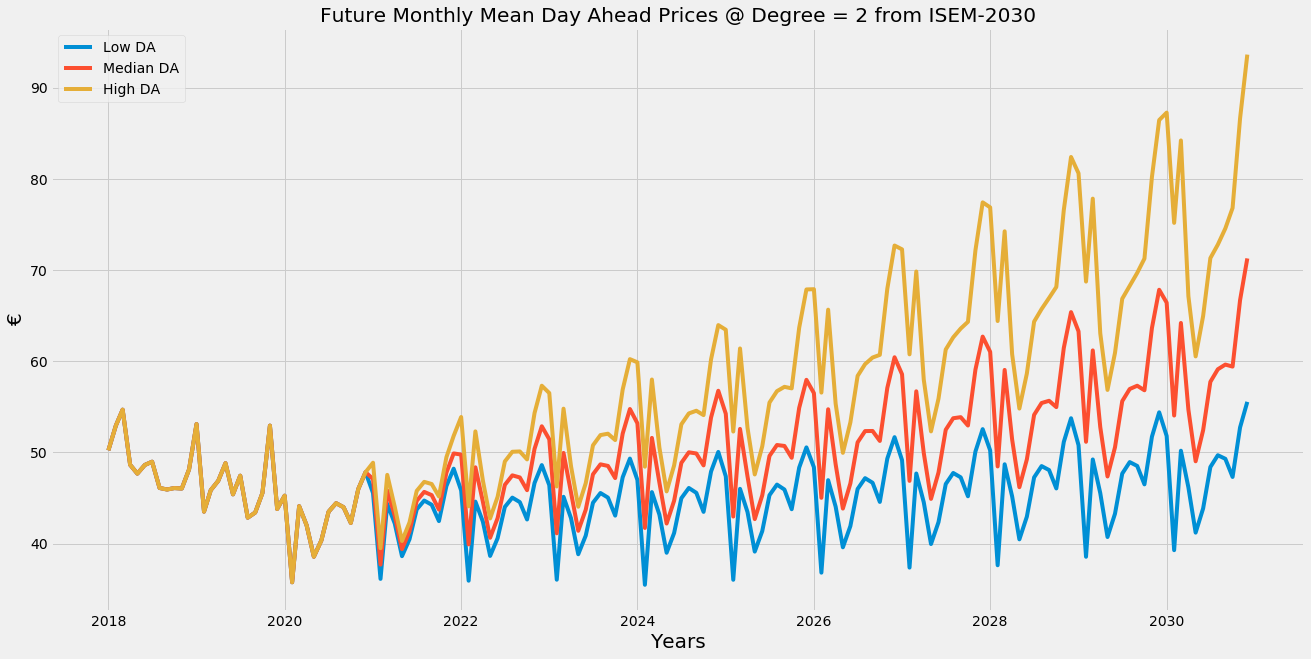

In [62]:
df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Low Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030')
plt.show()

### Degree = 3

In [63]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 3
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9

(-140.49016219675383,
 -0.048015216697293556,
 0.14378478484276921,
 -8.959401162548335e-06,
 2.745208614513929e-05,
 -3.8633155991085054e-05,
 -9.362586717194532e-10,
 3.232336334355046e-09,
 -4.528142328111273e-09,
 3.7149069098685317e-09)

In [64]:
df_d3A= pd.DataFrame(df1A.index)
df_d3A = df_d3A.set_index('date')

newlist = []
wd = df1A['wind']
dmd = df1A['low demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Low Demand 3 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on Median Demand 3 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3A['DA Ahead on High Demand 3 degree'] = newlist

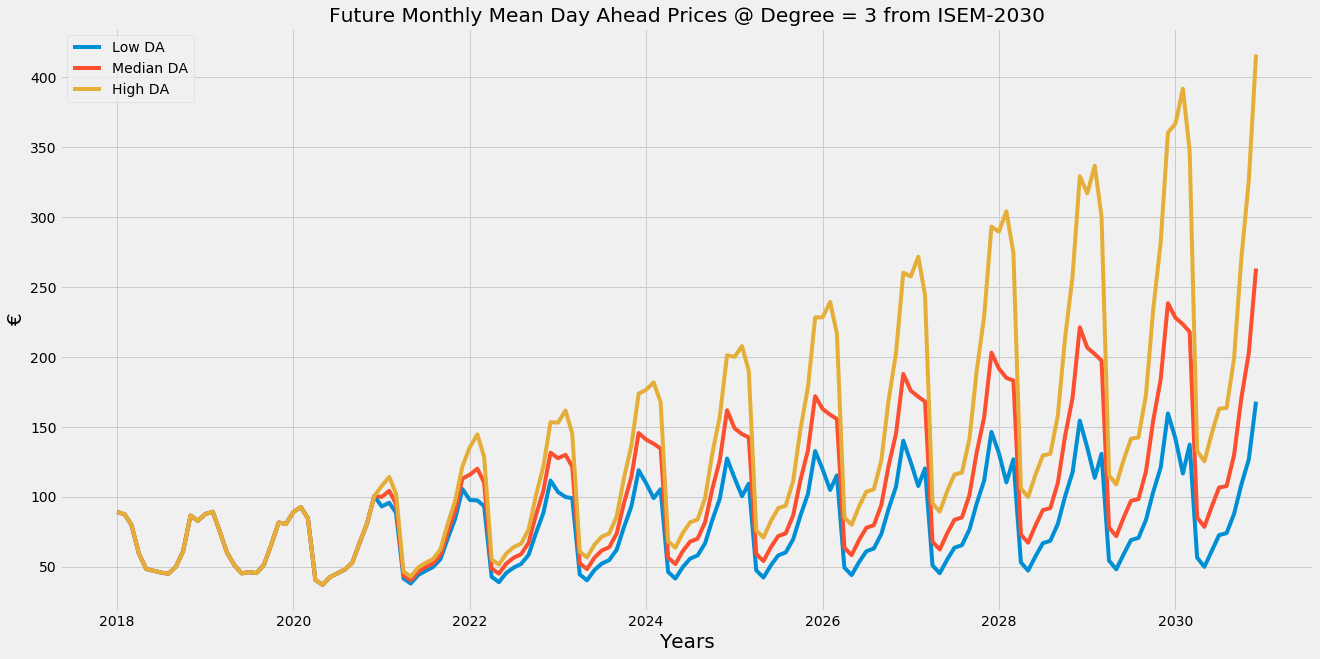

In [65]:
df_d3A = df_d3A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d3A['DA Ahead on Low Demand 3 degree'])
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree'])
plt.plot(df_d3A['DA Ahead on High Demand 3 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 3 from ISEM-2030')

plt.show()

### Degree = 4

In [66]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=4)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 4
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9,theta10,theta11,theta12,theta13,theta14

(-236.3260577484695,
 0.011575758002052485,
 0.21335185604525095,
 3.577372908760027e-06,
 -2.5577194573802646e-05,
 -5.354028691357817e-05,
 -1.49831615276169e-09,
 -2.4028289040200102e-09,
 1.024793410668057e-08,
 4.2895699394811595e-09,
 3.429759189328696e-13,
 -5.253603541782725e-13,
 9.996389566807595e-13,
 -1.3803087362332378e-12,
 8.00540189693777e-14)

In [67]:
df_d4A= pd.DataFrame(df1A.index)
df_d4A = df_d4A.set_index('date')

newlist = []
wd = df1A['wind']
dmd = df1A['low demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Low Demand 4 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on Median Demand 4 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*((wd.iloc[i])**2)) + (theta5*((dmd.iloc[i])**2)) +(theta6*((wd.iloc[i])**2)*dmd.iloc[i]) + (theta7*wd.iloc[i]*((dmd.iloc[i])**2)) +(theta8*((wd.iloc[i])**3)) + (theta9*((dmd.iloc[i])**3)) +(theta10*((wd.iloc[i])**3)*dmd.iloc[i]) + (theta11*((dmd.iloc[i])**3)*wd.iloc[i]) + (theta12*((dmd.iloc[i])**2)*((wd.iloc[i])**2)) +(theta13*((wd.iloc[i])**4)) + (theta14*((dmd.iloc[i])**4)))  
    
df_d4A['DA Ahead on High Demand 4 degree'] = newlist

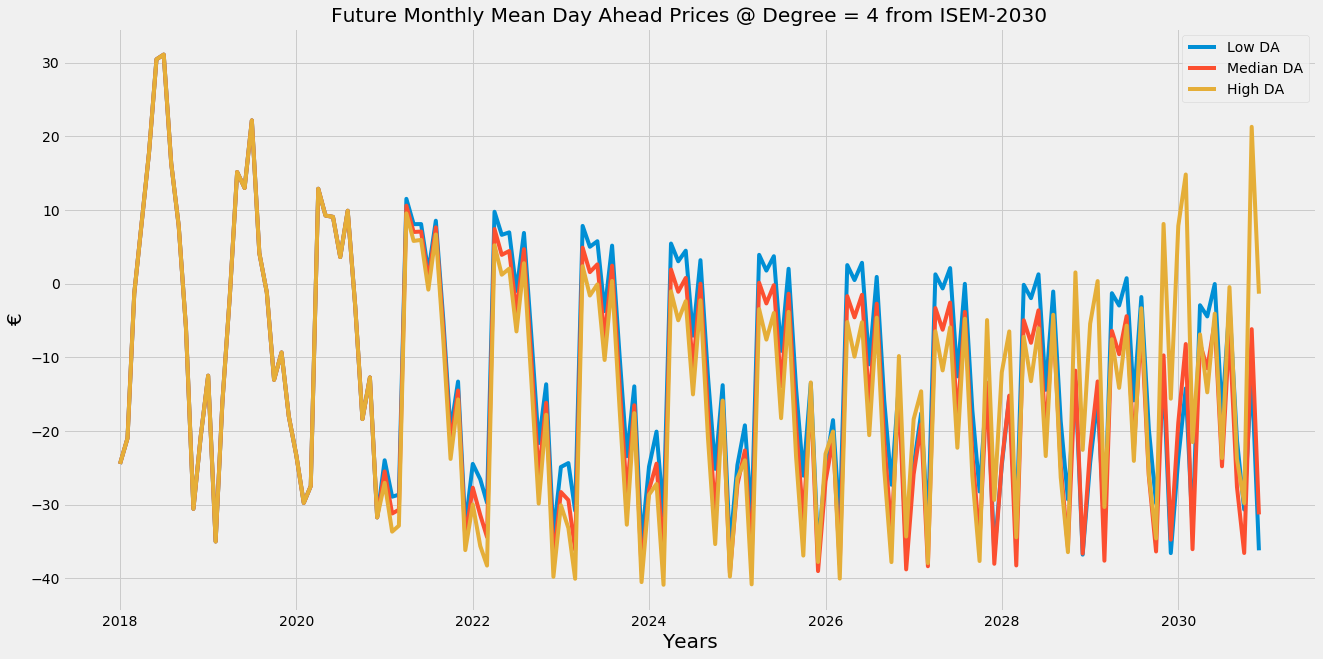

In [68]:
df_d4A = df_d4A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d4A['DA Ahead on Low Demand 4 degree'])
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree'])
plt.plot(df_d4A['DA Ahead on High Demand 4 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Monthly Mean Day Ahead Prices @ Degree = 4 from ISEM-2030')

plt.show()

# All Degrees Plotted

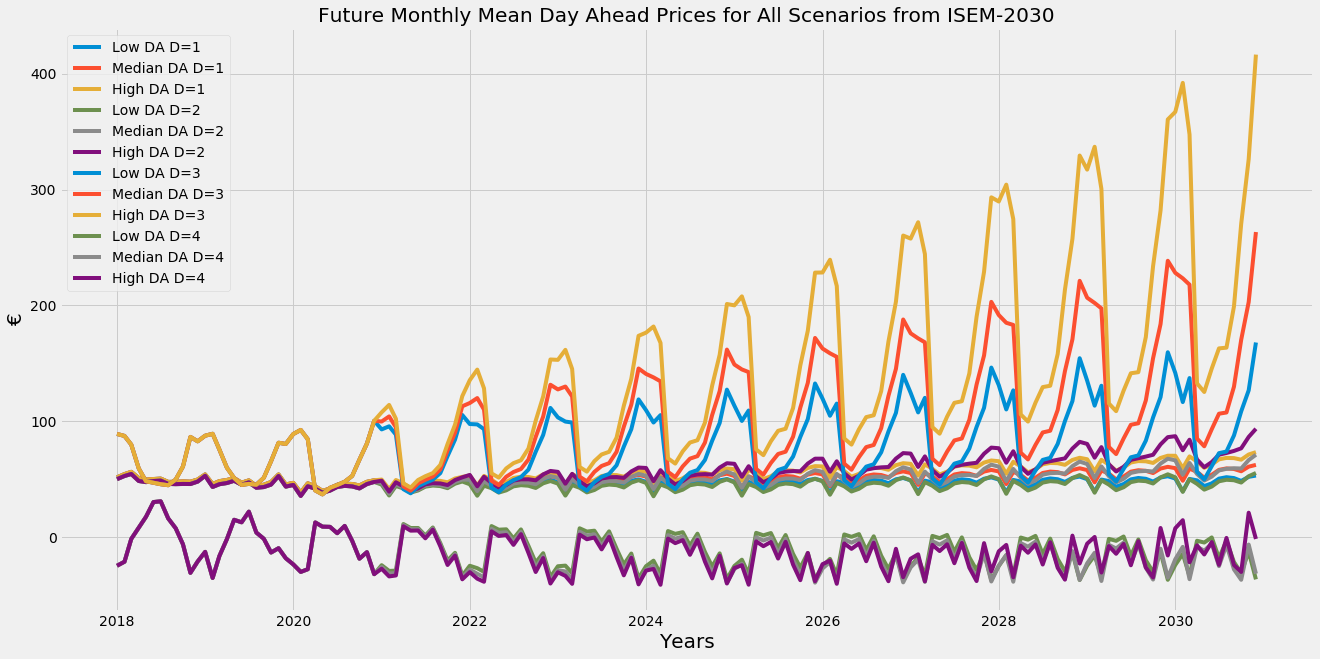

In [69]:
plt.figure(figsize=(20,10))


plt.plot(df_d1A['DA Ahead on Low Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on Median Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on High Demand 1 degree'])

plt.plot(df_d2A['DA Ahead on Low Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree'])

plt.plot(df_d3A['DA Ahead on Low Demand 3 degree'])
plt.plot(df_d3A['DA Ahead on Median Demand 3 degree'])
plt.plot(df_d3A['DA Ahead on High Demand 3 degree'])

plt.plot(df_d4A['DA Ahead on Low Demand 4 degree'])
plt.plot(df_d4A['DA Ahead on Median Demand 4 degree'])
plt.plot(df_d4A['DA Ahead on High Demand 4 degree'])


plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2'])

plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2',
                   'Low DA D=3', 'Median DA D=3','High DA D=3'])



plt.legend(labels=['Low DA D=1', 'Median DA D=1','High DA D=1',
                   'Low DA D=2', 'Median DA D=2','High DA D=2',
                   'Low DA D=3', 'Median DA D=3','High DA D=3',
                   'Low DA D=4', 'Median DA D=4','High DA D=4'])

plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Future Monthly Mean Day Ahead Prices for All Scenarios from ISEM-2030')

plt.show()

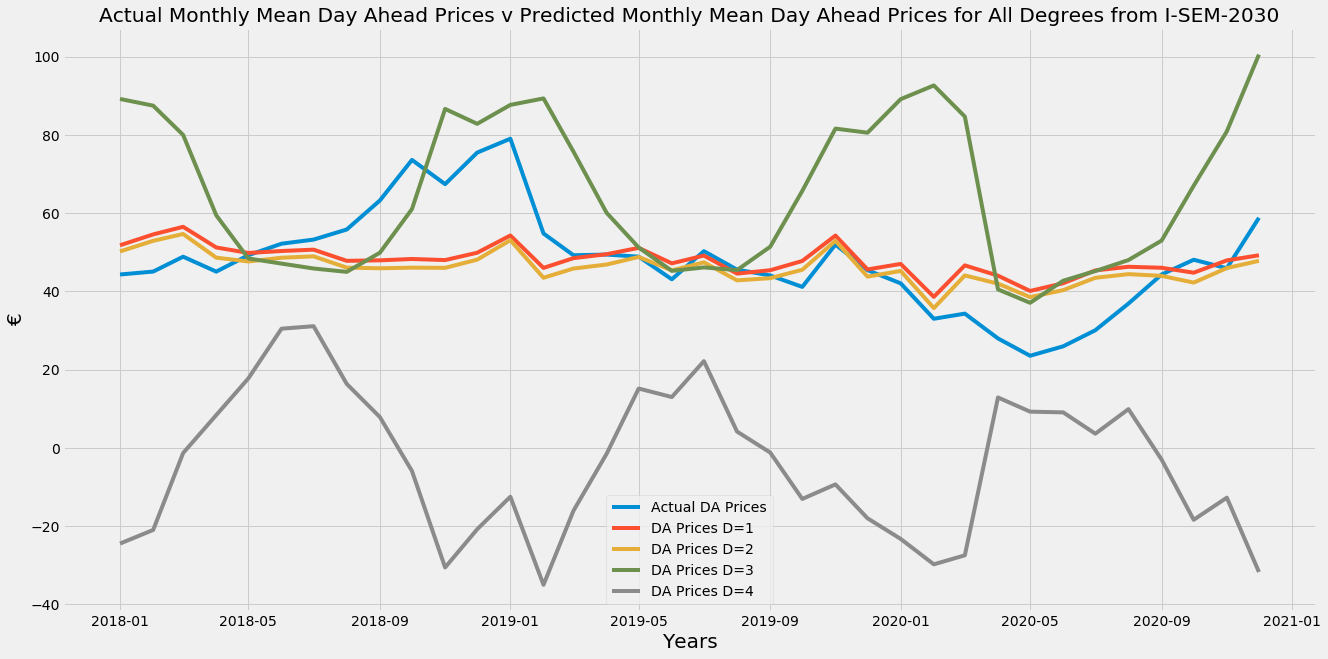

In [70]:
plt.figure(figsize=(20,10))


plt.plot(dfA['DA_Prices'].resample('MS').mean())

plt.plot(df_d1A['DA Ahead on High Demand 1 degree'].loc[df_d1A.index < dt.datetime(2021,1,1)])

plt.plot(df_d2A['DA Ahead on High Demand 2 degree'].loc[df_d2A.index < dt.datetime(2021,1,1)])

plt.plot(df_d3A['DA Ahead on High Demand 3 degree'].loc[df_d3A.index < dt.datetime(2021,1,1)])

plt.plot(df_d4A['DA Ahead on High Demand 4 degree'].loc[df_d4A.index < dt.datetime(2021,1,1)])

plt.legend(labels=['Actual DA Prices', 'DA Prices D=1','DA Prices D=2',
                   'DA Prices D=3','DA Prices D=4'])


plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.title('Actual Monthly Mean Day Ahead Prices v Predicted Monthly Mean Day Ahead Prices for All Degrees from I-SEM-2030')

plt.show()

In [71]:
df_corr = pd.DataFrame()

df_corr['Actual'] = (dfA['DA_Prices'].resample('MS').mean()).tolist()

df_corr['D=1'] = (df_d1A['DA Ahead on High Demand 1 degree'].loc[df_d1A.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=2'] = (df_d2A['DA Ahead on High Demand 2 degree'].loc[df_d2A.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=3'] = (df_d3A['DA Ahead on High Demand 3 degree'].loc[df_d3A.index < dt.datetime(2021,1,1)]).tolist()

df_corr['D=4'] = (df_d4A['DA Ahead on High Demand 4 degree'].loc[df_d4A.index < dt.datetime(2021,1,1)]).tolist()

(df_corr.corr()).Actual

Actual    1.000000
D=1       0.549888
D=2       0.548161
D=3       0.336166
D=4      -0.168749
Name: Actual, dtype: float64

### Best Results  REDO

In [72]:
X = np.array(df[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(df.DA_Prices)
 
pre_process = PolynomialFeatures(degree=3)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)


#degree = 3
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5, theta6, theta7,theta8, theta9 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5, theta6, theta7,theta8, theta9

(-133.3616796417149,
 -0.0371328355328834,
 0.1329193342054633,
 -9.296723711418173e-06,
 2.265293787485346e-05,
 -3.521579624961594e-05,
 -7.277724646884143e-10,
 2.870182600270277e-09,
 -3.614438734422798e-09,
 3.2753256842821266e-09)

In [73]:
df_d3= pd.DataFrame(df1.index)
df_d3 = df_d3.set_index('date')

newlist = []
wd = df1['wind']
dmd = df1['low demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on Low Demand 3 degree'] = newlist


newlist = []
wd = df1['wind']
dmd = df1['median demand']

for i in range(0,len(df1)):
    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on Median Demand 3 degree'] = newlist

newlist = []
wd = df1['wind']
dmd = df1['high demand']

for i in range(0,len(df1)):

    newlist.append(theta0 + (theta1*wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]) +(theta6*wd.iloc[i]*wd.iloc[i]*dmd.iloc[i]) + (theta7*wd.iloc[i]*dmd.iloc[i]*dmd.iloc[i]) +(theta8*wd.iloc[i]*wd.iloc[i]*wd.iloc[i]) + (theta9*dmd.iloc[i]*dmd.iloc[i]*dmd.iloc[i])) 
    
df_d3['DA Ahead on High Demand 3 degree'] = newlist

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


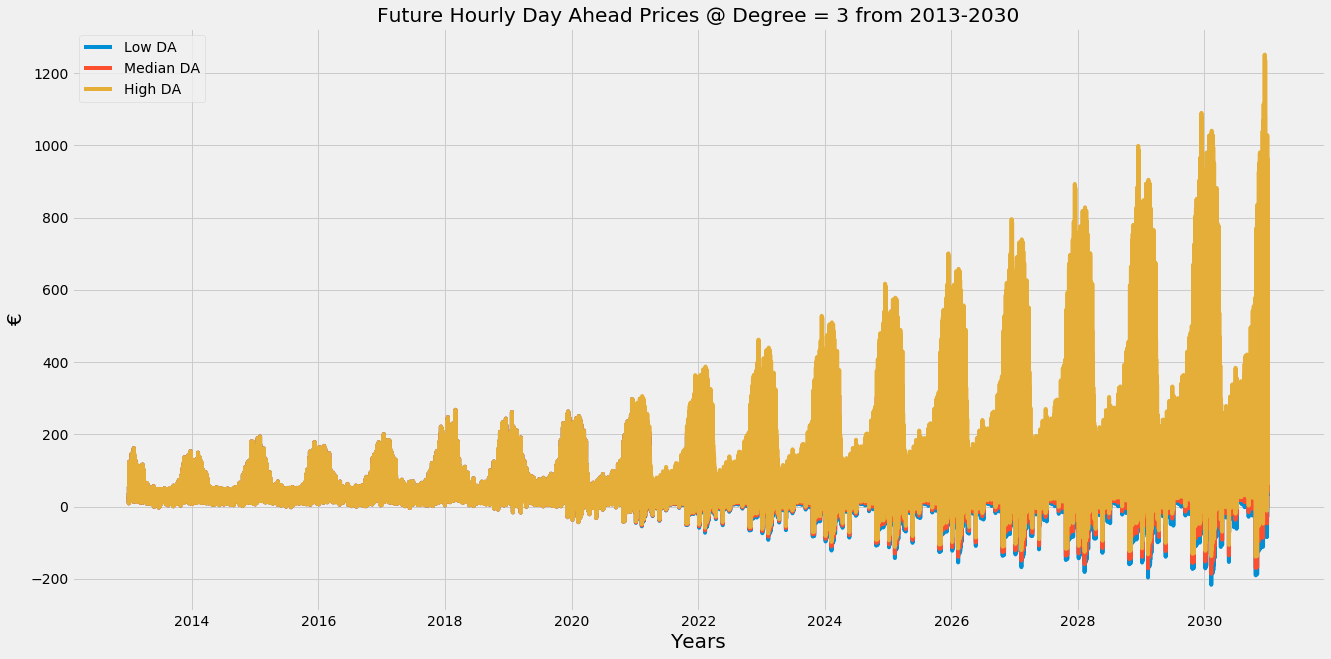

In [74]:
plt.figure(figsize=(20,10))
plt.plot(df_d3['DA Ahead on Low Demand 3 degree'])
plt.plot(df_d3['DA Ahead on Median Demand 3 degree'])
plt.plot(df_d3['DA Ahead on High Demand 3 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Hourly Day Ahead Prices @ Degree = 3 from 2013-2030')

plt.show()

In [75]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)

pre_process = PolynomialFeatures(degree=1)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 1
theta0 = pr_model.intercept_
_, theta1, theta2 = pr_model.coef_
theta0, theta1, theta2 

(-5.351520616057492, -0.00989827113878432, 0.0158203155821)

In [76]:
df_d1A= pd.DataFrame(df1A.index)
df_d1A = df_d1A.set_index('date')
newlist = []
wd = df1A['wind']
dmd = df1A['low demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on Low Demand 1 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['median demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on Median Demand 1 degree'] = newlist

newlist = []
wd = df1A['wind']
dmd = df1A['high demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]))
    
df_d1A['DA Ahead on High Demand 1 degree'] = newlist

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


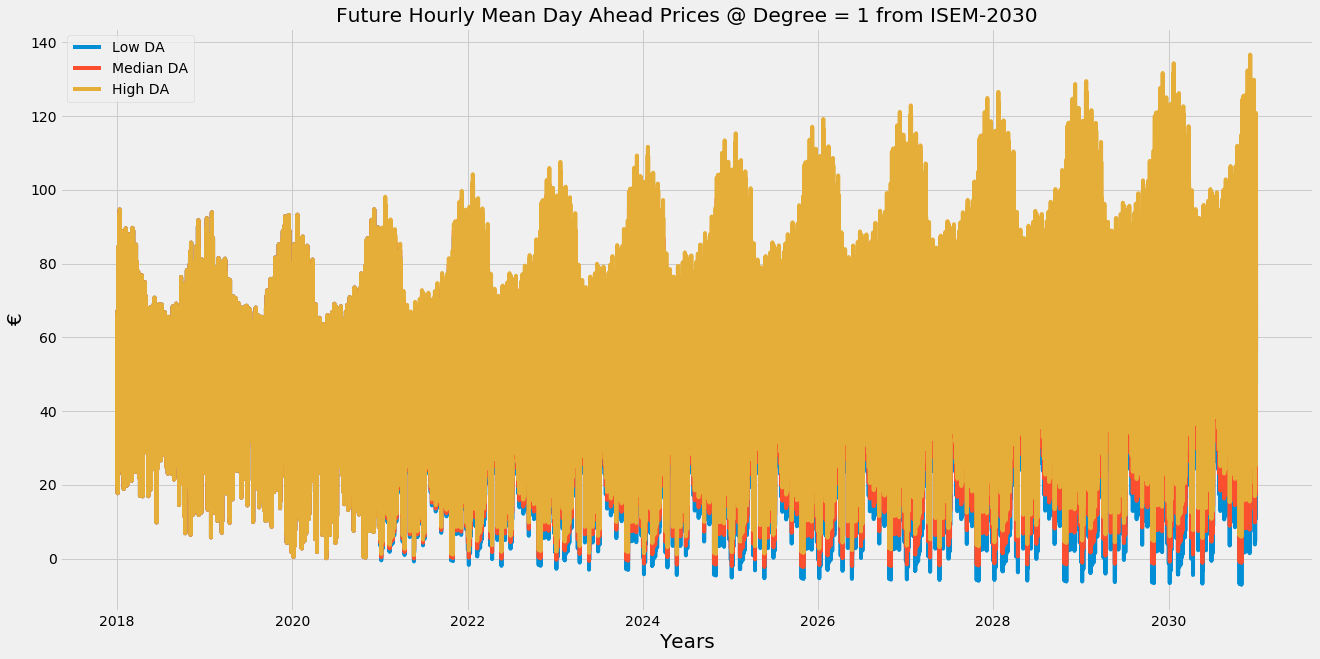

In [77]:
plt.figure(figsize=(20,10))
plt.plot(df_d1A['DA Ahead on Low Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on Median Demand 1 degree'])
plt.plot(df_d1A['DA Ahead on High Demand 1 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Hourly Mean Day Ahead Prices @ Degree = 1 from ISEM-2030')

plt.show()

In [78]:
X = np.array(dfA[["Total_Wind_Fcast","Total_Demand_Fcast"]])
y = np.array(dfA.DA_Prices)


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

 
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly

pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)

#degree = 2
theta0 = pr_model.intercept_
_, theta1, theta2, theta3, theta4, theta5 = pr_model.coef_
theta0, theta1, theta2, theta3,theta4, theta5

(61.30846597569776,
 -0.007509648751771861,
 -0.0172838531522913,
 -6.728886718198983e-07,
 -1.9988365409021047e-08,
 3.8803461070418405e-06)

In [79]:
df_d2A= pd.DataFrame(df1A.index)
df_d2A = df_d2A.set_index('date')

newlist = []
wd = df1A['wind']
dmd = df1A['low demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))

df_d2A['DA Ahead on Low Demand 2 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['median demand']


for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on Median Demand 2 degree'] = newlist


newlist = []
wd = df1A['wind']
dmd = df1A['high demand']

for i in range(0,len(df1A)):
    newlist.append(theta0 + (theta1* wd.iloc[i]) + (theta2*dmd.iloc[i]) + (theta3*dmd.iloc[i]*wd.iloc[i]) +(theta4*wd.iloc[i]*wd.iloc[i]) + (theta5*dmd.iloc[i]*dmd.iloc[i]))
    
df_d2A['DA Ahead on High Demand 2 degree'] = newlist

C:\Users\09ant\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


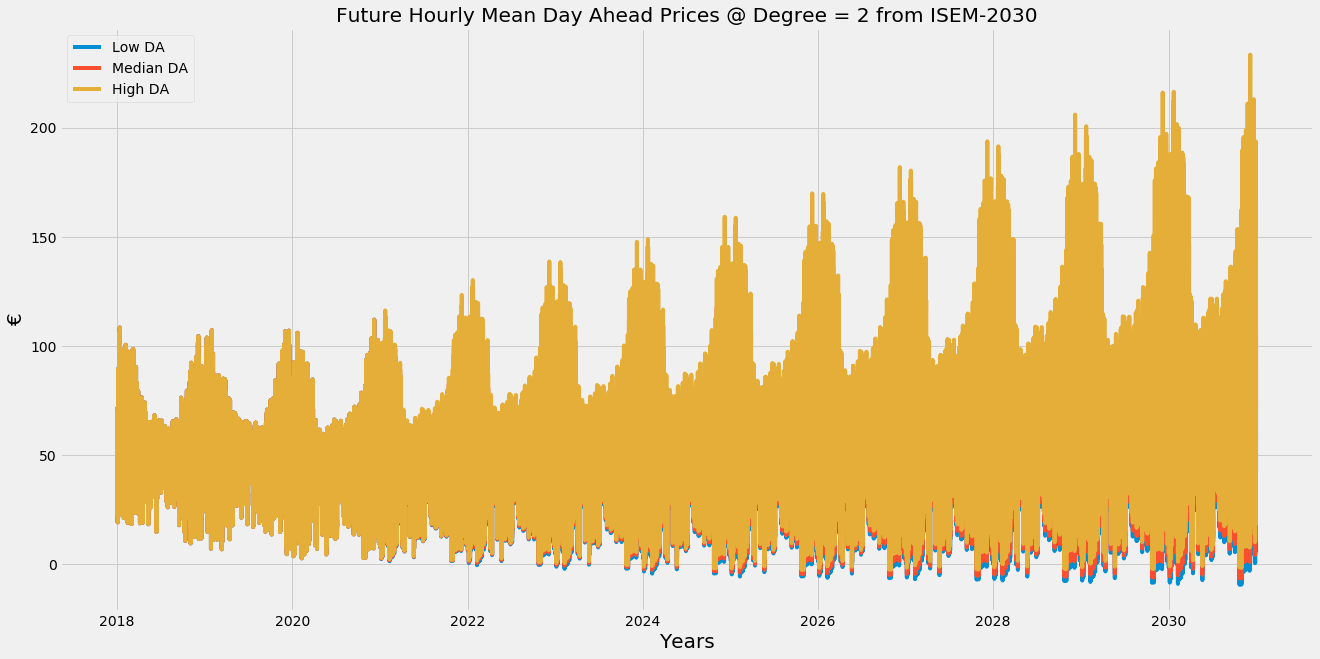

In [80]:
#df_d2A = df_d2A.resample('MS').mean()

plt.figure(figsize=(20,10))
plt.plot(df_d2A['DA Ahead on Low Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on Median Demand 2 degree'])
plt.plot(df_d2A['DA Ahead on High Demand 2 degree'])
plt.xlabel('Years', size =20)
plt.ylabel('€',size=20)
plt.legend(labels=['Low DA', 'Median DA','High DA'])
plt.title('Future Hourly Mean Day Ahead Prices @ Degree = 2 from ISEM-2030')
plt.show()